In [1]:
# Google Colab to test SipHash Accelerator
# Author - Ben Welte
# Date - 4/12/2022
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#########################################################################
# RAW ZEDBOARD DATA
#########################################################################

# Size of the messages hashed in bytes
input_sizes = [7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383, 32767, 65535, 1048575]

# Hardware hash times in clock cycles
zedboard_hw_24_x1_cycles = [77, 59, 98, 98, 100, 118, 155, 203, 351, 603, 1110, 2132, 4188, 8291, 131161]
zedboard_hw_24_x2_cycles = [101, 101, 120, 122, 120, 139, 173, 245, 371, 623, 1131, 2158, 4205, 8309, 131177]

zedboard_hw_24_x3_cycles = [163, 207, 204, 204, 230, 254, 277, 318, 447, 717, 1220, 2273, 4331, 8487, 132683]
zedboard_hw_24_x4_cycles = [206, 248, 246, 246, 248, 279, 278, 342, 479, 739, 1256, 2299, 4355, 8499, 132898]

zedboard_hw_13_x1_cycles = [78, 134, 133, 134, 132, 151, 191, 262, 388, 640, 1145, 2167, 4221, 8325, 131191]
zedboard_hw_13_x2_cycles = [118, 156, 175, 175, 173, 193, 229, 303, 428, 679, 1186, 2209, 4263, 8364, 132783]

zedboard_hw_13_x3_cycles = [173, 217, 217, 217, 217, 241, 261, 345, 465, 725, 1253, 2283, 4343, 8485, 132725]
zedboard_hw_13_x4_cycles = [181, 225, 247, 242, 242, 265, 307, 365, 485, 745, 1271, 2303, 4383, 8527, 132783]

# Software hash times in clock cycles (optimized w/-O3)
zedboard_sw_24_x1_cycles = [133, 160, 167, 260, 308, 390, 541, 873, 1528, 2823, 5460, 10710, 21167, 42140, 670967]
zedboard_sw_24_x2_cycles = [157, 192, 211, 313, 398, 562, 895, 1550, 2870, 5489, 10717, 21180, 42154, 84077, 1341712]

zedboard_sw_24_x3_cycles = [190, 186, 189, 309, 366, 590, 1044, 1951, 3762, 7391, 14648, 29166, 58215, 116312, 1858581]
zedboard_sw_24_x4_cycles = [222, 216, 229, 370, 462, 760, 1368, 2578, 4992, 9833, 19511, 38865, 77599, 155054, 2478065]

zedboard_sw_13_x1_cycles = [124, 89, 77, 112, 106, 148, 238, 420, 781, 1504, 2951, 5844, 11632, 23219, 370559]
zedboard_sw_13_x2_cycles = [121, 95, 90, 139, 152, 242, 423, 783, 1507, 2954, 5848, 11638, 23221, 46393, 740951]

zedboard_sw_13_x3_cycles = [214, 220, 220, 310, 370, 573, 984, 1796, 3425, 6679, 13189, 26211, 52283, 104388, 1667186]
zedboard_sw_13_x4_cycles = [240, 257, 263, 373, 465, 738, 1289, 2372, 4543, 8883, 17563, 34925, 69688, 139170, 2223005]



In [3]:
#########################################################################
# RAW Zedboard Multiplexed DATA
#########################################################################

#Hardware hash times in clock cycles
zedmux_hw_24_x5_cycles = [265, 309, 307, 307, 306, 306, 339, 403, 528, 797, 1322, 2347, 4426, 8583, 133386]
zedmux_hw_24_x6_cycles = [314, 354, 354, 355, 355, 354, 355, 428, 553, 804, 1324, 2371, 4451, 8610, 133586]

zedmux_hw_24_x7_cycles = [356, 398, 398, 396, 397, 398, 398, 454, 577, 826, 1369, 2395, 4500, 8652, 133791]
zedmux_hw_24_x8_cycles = [402, 446, 443, 444, 443, 443, 444, 476, 606, 860, 1399, 2450, 4549, 8749, 134708]

zedmux_hw_13_x5_cycles = [303, 347, 344, 346, 347, 344, 378, 455, 586, 929, 1550, 2809, 5335, 10407, 186437]
zedmux_hw_13_x6_cycles = [353, 401, 396, 393, 397, 397, 393, 481, 623, 960, 1643, 2928, 5576, 10962, 177823]

zedmux_hw_13_x7_cycles = [403, 446, 444, 446, 447, 445, 447, 489, 698, 1114, 1900, 3478, 6638, 12939, 209303]
zedmux_hw_13_x8_cycles = [453, 500, 498, 495, 494, 499, 499, 541, 732, 1171, 2009, 3698, 7071, 13799, 216247]

#Software hash times in clock cycles (optimized w/-O3)
zedmux_sw_24_x5_cycles = [228, 208, 226, 387, 513, 893, 1657, 3173, 6204, 12278, 24374, 48619, 97118, 194137, 3104166]
zedmux_sw_24_x6_cycles = [265, 239, 265, 457, 611, 1067, 1979, 3797, 7424, 14695, 29184, 58216, 116301, 232887, 3723740]

zedmux_sw_24_x7_cycles = [284, 262, 305, 501, 708, 1241, 2309, 4429, 8669, 17162, 34148, 68121, 136093, 272054, 4349830]
zedmux_sw_24_x8_cycles = [300, 298, 346, 450, 803, 1416, 2627, 5051, 9898, 19601, 39005, 77814, 155479, 310800, 4969278]

zedmux_sw_13_x5_cycles = [270, 298, 311, 459, 567, 900, 1586, 2938, 5653, 11076, 21927, 43631, 87087, 173953, 2778728]
zedmux_sw_13_x6_cycles = [294, 333, 359, 505, 663, 1064, 1892, 3512, 6772, 13282, 26305, 52347, 104475, 208739, 3334433]

zedmux_sw_13_x7_cycles = [329, 366, 401, 570, 754, 1229, 2187, 4081, 7884, 15478, 30671, 61063, 121891, 243504, 3890233]
zedmux_sw_13_x8_cycles = [356, 402, 443, 635, 850, 1392, 2491, 4657, 8999, 17678, 35042, 69766, 139285, 278288, 4445929]


In [4]:
#########################################################################
# RAW ZCU106 DATA
#########################################################################

# Hardware hash times in clock cycles
zcu106_hw_24_x1_cycles = [137, 170, 170, 236, 201, 203, 234, 298, 489, 682, 1197, 2289, 4406, 8686, 136342]
zcu106_hw_24_x2_cycles = [169, 215, 213, 212, 212, 250, 279, 345, 476, 735, 1254, 2319, 4469, 8724, 136391]

zcu106_hw_24_x3_cycles = [193, 255, 255, 255, 254, 288, 388, 387, 516, 744, 1358, 2367, 4508, 8769, 136738]
zcu106_hw_24_x4_cycles = [232, 299, 295, 293, 294, 295, 361, 397, 526, 813, 1393, 2417, 4535, 8784, 136724]

zcu106_hw_13_x1_cycles = [139, 172, 170, 169, 202, 203, 236, 303, 431, 691, 1276, 2312, 4428, 8698, 136346]
zcu106_hw_13_x2_cycles = [149, 217, 212, 212, 213, 246, 282, 344, 474, 734, 1252, 2327, 4464, 8769, 136407]

zcu106_hw_13_x3_cycles = [191, 255, 253, 253, 254, 286, 319, 389, 516, 836, 1284, 2376, 4499, 8764, 136761]
zcu106_hw_13_x4_cycles = [234, 299, 295, 294, 295, 294, 330, 493, 527, 784, 1296, 2388, 4542, 8805, 136657]

# Software hash times in clock cycles (optimized w/-O3)
zcu106_sw_24_x1_cycles = [213, 77, 61, 92, 113, 156, 243, 389, 732, 1419, 2814, 5584, 11137, 22859, 357289]
zcu106_sw_24_x2_cycles = [256, 104, 85, 130, 173, 280, 405, 748, 1434, 2872, 5617, 11089, 22248, 44285, 724692]

zcu106_sw_24_x3_cycles = [198, 155, 142, 203, 264, 411, 625, 1140, 2166, 4223, 8363, 16686, 33420, 66677, 1066740]
zcu106_sw_24_x4_cycles = [215, 174, 167, 240, 323, 514, 813, 1496, 2869, 5677, 11166, 22221, 44226, 88686, 1429977]

zcu106_sw_13_x1_cycles = [169, 49, 53, 85, 95, 120, 147, 274, 455, 867, 1714, 3436, 6763, 13466, 218606]
zcu106_sw_13_x2_cycles = [209, 67, 75, 112, 135, 209, 264, 470, 882, 1705, 3379, 6720, 13881, 27603, 428768]

zcu106_sw_13_x3_cycles = [169, 115, 129, 172, 210, 313, 415, 725, 1340, 2575, 5069, 10079, 20747, 40324, 640422]
zcu106_sw_13_x4_cycles = [182, 132, 149, 199, 255, 374, 538, 944, 1767, 3415, 6730, 13388, 26781, 53705, 851521]

In [5]:
#########################################################################
# RAW ZCU106 Multiplexed DATA
#########################################################################

zcumux_hw_24_x5_cycles = [278, 343, 341, 342, 342, 341, 404, 470, 627, 942, 1609, 2819, 5414, 10458, 162497]
zcumux_hw_24_x6_cycles = [321, 351, 351, 353, 384, 383, 451, 512, 671, 1015, 1649, 2886, 5444, 10503, 163189]
zcumux_hw_24_x7_cycles = [331, 394, 394, 394, 394, 427, 463, 554, 714, 1065, 1695, 2924, 5553, 10699, 165688]
zcumux_hw_24_x8_cycles = [374, 440, 438, 439, 438, 472, 507, 570, 794, 1112, 1717, 3023, 5609, 10790, 166184]

zcumux_hw_24_x9_cycles = [418, 482, 484, 482, 481, 483, 548, 675, 836, 1214, 2017, 3606, 6798, 13076, 202762]
zcumux_hw_24_x10_cycles = [462, 525, 524, 524, 524, 524, 590, 657, 880, 1291, 2061, 3655, 6809, 13119, 205561]
zcumux_hw_24_x11_cycles = [503, 567, 568, 568, 568, 568, 602, 698, 953, 1336, 2104, 3660, 6856, 13171, 206301]
zcumux_hw_24_x12_cycles = [547, 611, 612, 610, 609, 610, 642, 744, 934, 1314, 2144, 3706, 6868, 13215, 203034]

zcumux_hw_24_x13_cycles = [617, 685, 685, 683, 685, 685, 720, 822, 1151, 1620, 2513, 4338, 7830, 14270, 186945]
zcumux_hw_24_x14_cycles = [661, 729, 731, 728, 728, 728, 731, 832, 1095, 1657, 2557, 4342, 7892, 14055, 196920]
zcumux_hw_24_x15_cycles = [707, 775, 776, 775, 776, 775, 775, 883, 1145, 1741, 2674, 4698, 8451, 15623, 226871]
zcumux_hw_24_x16_cycles = [751, 819, 819, 819, 819, 819, 818, 923, 1185, 1815, 2809, 5098, 9498, 18290, 268140]

zcumux_hw_13_x5_cycles = [304, 376, 373, 375, 375, 374, 482, 520, 692, 1042, 1811, 3212, 6149, 11926, 185000]
zcumux_hw_13_x6_cycles = [354, 387, 385, 423, 424, 422, 494, 565, 741, 1160, 1895, 3258, 6237, 12009, 187957]
zcumux_hw_13_x7_cycles = [362, 431, 431, 432, 468, 466, 577, 610, 785, 1132, 1905, 3304, 6244, 12019, 185657]
zcumux_hw_13_x8_cycles = [409, 478, 478, 478, 479, 513, 552, 624, 834, 1146, 1950, 3314, 6224, 12100, 185668]

zcumux_hw_13_x9_cycles = [457, 528, 528, 528, 527, 528, 601, 673, 883, 1263, 2107, 3645, 6866, 13272, 204755]
zcumux_hw_13_x10_cycles = [503, 574, 574, 576, 611, 575, 652, 720, 930, 1383, 2152, 3695, 6946, 13352, 205266]
zcumux_hw_13_x11_cycles = [551, 622, 623, 620, 622, 620, 730, 768, 978, 1394, 2305, 4057, 7520, 14275, 210695]
zcumux_hw_13_x12_cycles = [597, 666, 666, 667, 666, 666, 701, 811, 1054, 1474, 2453, 4310, 8127, 15616, 240594]

zcumux_hw_13_x13_cycles = [618, 686, 684, 684, 685, 721, 685, 823, 1055, 1618, 2511, 4345, 7825, 14203, 186151]
zcumux_hw_13_x14_cycles = [661, 728, 731, 728, 728, 728, 731, 833, 1195, 1692, 2549, 4377, 7895, 14144, 196537]
zcumux_hw_13_x15_cycles = [706, 773, 773, 773, 773, 773, 773, 881, 1141, 1737, 2667, 4652, 8471, 15621, 231836]
zcumux_hw_13_x16_cycles = [751, 819, 818, 818, 818, 819, 819, 988, 1220, 1715, 2910, 5028, 9436, 18325, 272230]


#Software Hash Times in Clock Cycles (optimized w/-O3)
zcumux_sw_24_x5_cycles = [182, 162, 163, 225, 307, 468, 777, 1432, 2743, 5434, 10648, 21162, 42390, 85065, 1349662]
zcumux_sw_24_x6_cycles = [195, 177, 181, 252, 351, 545, 920, 1706, 3280, 6443, 12746, 25385, 50828, 101884, 1620899]
zcumux_sw_24_x7_cycles = [208, 192, 200, 279, 395, 624, 1062, 1982, 3816, 7504, 14852, 29593, 59240, 118456, 1888095]
zcumux_sw_24_x8_cycles = [221, 206, 219, 306, 440, 703, 1207, 2256, 4354, 8617, 16977, 33784, 67649, 136030, 2173884]

zcumux_sw_24_x9_cycles = [235, 221, 238, 332, 485, 779, 1350, 2530, 4890, 9706, 19086, 38015, 76357, 152905, 2426114]
zcumux_sw_24_x10_cycles = [247, 236, 256, 360, 533, 907, 1491, 2804, 5426, 10688, 21198, 42231, 84447, 169916, 2699416]
zcumux_sw_24_x11_cycles = [260, 250, 274, 387, 576, 933, 1635, 3078, 5964, 11748, 23292, 46480, 93038, 186180, 2978230]
zcumux_sw_24_x12_cycles = [273, 265, 294, 414, 621, 1010, 1782, 3352, 6499, 12813, 25404, 50618, 101247, 204266, 3249507]

zcumux_sw_24_x13_cycles = [327, 313, 351, 506, 752, 1240, 2192, 4144, 8045, 15862, 31471, 62791, 125558, 252906, 4015080]
zcumux_sw_24_x14_cycles = [341, 329, 372, 529, 804, 1327, 2355, 4455, 8655, 17075, 33884, 67606, 135272, 272519, 4319433]
zcumux_sw_24_x15_cycles = [354, 348, 395, 560, 885, 1415, 2521, 4769, 9271, 18288, 36301, 72412, 144714, 290727, 4628139]
zcumux_sw_24_x16_cycles = [369, 364, 416, 592, 907, 1507, 2685, 5084, 9883, 19561, 38729, 77181, 154979, 310032, 4936236]

zcumux_sw_13_x5_cycles = [151, 128, 143, 188, 239, 352, 513, 903, 1691, 3264, 6433, 12800, 25992, 53521, 839166]
zcumux_sw_13_x6_cycles = [161, 141, 159, 208, 271, 402, 601, 1073, 2019, 3905, 7703, 15322, 30620, 61522, 1003786]
zcumux_sw_13_x7_cycles = [172, 153, 174, 229, 302, 451, 691, 1241, 2345, 4548, 8973, 17820, 35749, 71912, 1138176]
zcumux_sw_13_x8_cycles = [183, 166, 190, 249, 333, 501, 781, 1410, 2671, 5188, 10242, 20379, 40813, 81698, 1325369]

zcumux_sw_13_x9_cycles = [193, 178, 205, 269, 387, 551, 872, 1578, 2996, 5877, 11545, 22861, 45829, 92001, 1476326]
zcumux_sw_13_x10_cycles = [204, 189, 220, 292, 395, 603, 962, 1748, 3322, 6519, 12814, 25474, 50834, 102628, 1621055]
zcumux_sw_13_x11_cycles = [215, 202, 236, 313, 426, 674, 1052, 1917, 3648, 7109, 14051, 27967, 55978, 112721, 1794337]
zcumux_sw_13_x12_cycles = [226, 215, 251, 337, 456, 704, 1139, 2087, 3973, 7748, 15320, 30499, 61017, 123061, 1945285]

zcumux_sw_13_x13_cycles = [271, 253, 297, 397, 554, 836, 1404, 2574, 4912, 9592, 18974, 37781, 75394, 152700, 2434786]
zcumux_sw_13_x14_cycles = [283, 269, 316, 422, 586, 898, 1505, 2766, 5288, 10383, 20465, 40665, 81123, 164145, 2605329]
zcumux_sw_13_x15_cycles = [295, 283, 334, 444, 621, 956, 1608, 2957, 5660, 11057, 21885, 43561, 87116, 175817, 2799789]
zcumux_sw_13_x16_cycles = [307, 297, 352, 468, 656, 1015, 1710, 3156, 6031, 11795, 23364, 46471, 92917, 187335, 2965018]

-----------------------------------------------------
Profile of Zedboard SipHash2-4 x1:
-----------------------------------------------------

Acceleration vs. software:  5.116 times


Zedboard SipHash2-4 x1:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.052
      15		|  0.145
      31		|  0.181
      63		|  0.367
     127		|  0.726
     255		|  1.235
     511		|  1.884
    1023		|  2.880
    2047		|  3.333
    4095		|  3.881
    8191		|  4.217
   16383		|  4.391
   32767		|  4.471
   65535		|  4.517
 1048575		|  4.568

Zedboard SipHash2-4 x1 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.091		|	 0.053
	 0.254		|	 0.094
	 0.316		|	 0.186
	 0.643		|	 0.242
	 1.270		|	 0.412
	 2.161		|	 0.654
	 3.297		|	 0.945
	 5.039		|	 1.172
	 5.832		|	 1.340
	 6.791		|	 1.451
	 7.379		|	 1.500
	 7.684		|	 1.530
	 7.824		|	 1.548
	 7.904		|	 1.555
	 7.995		|	 1.563


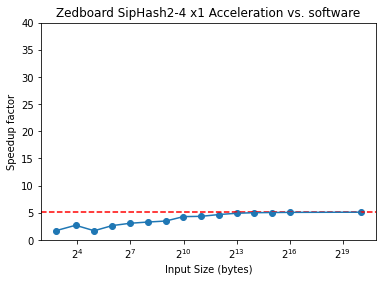

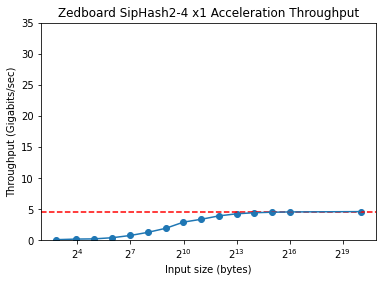

In [6]:
# Method to calculate and graph stuff based on hw & software times
#   Parameters:
#   - hw_cycles: np array of hw clock cycles
#   - sw_cycles: np array of sw clock cycles
#   - input_sizes: np array of input sizes (in bytes)
#   - name_string: string denoting the algorithm (must indicate the algorithm version, i.e. '1-3' or '2-4', and num cores as 'x<n>')
def graph_n_calc(hw_cycles, sw_cycles, input_sizes, name_string, display_data = True):
  if len(hw_cycles) != len(sw_cycles):
    print("Different number of clock cycle measurements for hardware and software! Exiting ...")
    return

  elif not(len(hw_cycles) == len(input_sizes)):
    print("Too many or too few hardware clock cycle measurements! Exiting ...")
    return
  if "x16" in name_string:
    very_slow = True
    slow = False
  elif "x15" in name_string:
    very_slow = True
    slow = False
  elif "x14" in name_string:
    very_slow = True
    slow = False
  elif "x13" in name_string:
    very_slow = True
    slow = False
  elif "x12" in name_string:
    slow = True
    very_slow = False
  elif "x11" in name_string:
    slow = True
    very_slow = False
  elif "x10" in name_string:
    slow = True
    very_slow = False
  elif "x9" in name_string:
    slow = True
    very_slow = False
  elif "x8" in name_string:
    slow = True
    very_slow = False
  elif "x7" in name_string:
    slow = True
    very_slow = False
  elif "x6" in name_string:
    slow = True
    very_slow = False
  elif "x5" in name_string:
    slow = True
    very_slow = False
  else:
    slow = False    
    very_slow = False


  # set clock period (ns) based on name string
  if "Zedboard" in name_string:
    if "1-3" in name_string:
      if slow:
        clk_per = 9.333
      else:
        clk_per = 9
    elif "2-4"in name_string:
      if slow:
        clk_per = 15.333
      else:
        clk_per = 14
    else:
      print("Couldn't determine clock speed from the name you gave the data.  Exiting ...")
      return
  elif "ZCU106" in name_string:
    if "2-4" in name_string:
      if slow:
        clk_per = 5.086
      elif very_slow:
        clk_per = 5.333
      else:
        clk_per = 4.667
    elif "1-3" in name_string:
      if slow:
        clk_per = 4.737
      elif very_slow:
        clk_per = 5.333
      else:
        clk_per = 4.667
  else:
    print("What board is this? Idk")
    return

  # get num cores based on name string
  if "x9" in name_string:
    num_cores = 9
  elif "x10" in name_string:
    num_cores = 10
  elif "x11" in name_string:
    num_cores = 11
  elif "x12" in name_string:
    num_cores = 12
  elif "x13" in name_string:
    num_cores = 13
  elif "x14" in name_string:
    num_cores = 14
  elif "x15" in name_string:
    num_cores = 15
  elif "x16" in name_string:
    num_cores = 16
  elif "x1" in name_string:
    num_cores = 1
  elif "x2" in name_string:
    num_cores = 2
  elif "x3" in name_string:
    num_cores = 3
  elif "x4" in name_string:
    num_cores = 4
  elif "x5" in name_string:
    num_cores = 5
  elif "x6" in name_string:
    num_cores = 6
  elif "x7" in name_string:
    num_cores = 7
  elif "x8" in name_string:
    num_cores = 8

  else:
    print("Couldn't determine num. cores from name string: exiting")
    return

  # Calculate hash times in ns
  hw_times_ns = np.zeros(len(hw_cycles))
  sw_times_ns = np.zeros(len(sw_cycles))
  for i in range(len(hw_times_ns)):
    hw_times_ns[i] = hw_cycles[i] * clk_per
    sw_times_ns[i] = sw_cycles[i] * clk_per

  # Calculate speedup factor:
  speedup = np.zeros(len(hw_cycles))
  for i in range(len(hw_cycles)):
    speedup[i] = sw_cycles[i] / hw_cycles[i]

  # Calculate throughput:
  throughput_hw = np.zeros(len(hw_times_ns))
  throughput_sw = np.zeros(len(sw_times_ns))

  for i in range(len(throughput_hw)):
    throughput_hw[i] = input_sizes[i] * num_cores / hw_cycles[i]
    throughput_sw[i] = input_sizes[i] * num_cores / sw_cycles[i]

  # Calculate throughput in bytes/sec:
  throughput_Gb = np.zeros(len(throughput_hw))

  for i in range(len(throughput_hw)):
    throughput_Gb[i] = (8.0 * throughput_hw[i]) / clk_per

  if display_data:

    print("-----------------------------------------------------")
    print(f"Profile of {name_string}:")
    print("-----------------------------------------------------")

    # Graph acceleration vs. software
    fig = plt.figure()
    plt.title(f"{name_string} Acceleration vs. software")
    plt.ylabel("Speedup factor")
    plt.xlabel("Input Size (bytes)")
    plt.scatter(input_sizes, speedup, label = f"{name_string} Speedup", linestyle = "solid")
    plt.xscale("log", basex = 2)
    if "Zedboard" in name_string:
      plt.ylim(0, 40.0)
    elif "ZCU106" in name_string:
      plt.ylim(0, 25.0)
    plt.axhline(y = speedup[len(speedup) - 1], color = 'r', linestyle = '--')
    plt.plot(input_sizes, speedup)

    print(f"\nAcceleration vs. software: {speedup[len(speedup) - 1] : .3f} times\n")
    print(f"\n{name_string}:")
    print("Input size (bytes)\t| Throughput (Gb/sec)")
    for i in range(len(throughput_hw)):
      print(f"{input_sizes[i] : 8d}\t\t| {throughput_Gb[i] : .3f}")

    fig = plt.figure()
    plt.title(f"{name_string} Acceleration Throughput")
    plt.ylabel("Throughput (Gigabits/sec)")
    plt.xlabel("Input size (bytes)")
    plt.scatter(input_sizes, throughput_Gb, linestyle = "solid")
    plt.xscale("log", basex = 2)
    if "Zedboard" in name_string:
      plt.ylim(0, 35.0)
    elif "ZCU106" in name_string:
      plt.ylim(0, 140.0)
    plt.axhline(y = throughput_Gb[len(throughput_Gb) - 1], color = 'r', linestyle = '--')
    plt.plot(input_sizes, throughput_Gb)


    print(f"\n{name_string} throughput:")
    print("HW Throughput (b/cycle)\t| SW Throughput (b/cycle)")

    for i in range(len(throughput_hw)):
      print(f"\t{throughput_hw[i] : .3f}\t\t|\t{throughput_sw[i] : .3f}")

  return throughput_Gb, speedup




zedboard_throughput_24_x1, zedboard_speedup_24_x1 = graph_n_calc(zedboard_hw_24_x1_cycles, zedboard_sw_24_x1_cycles, input_sizes, "Zedboard SipHash2-4 x1")

-----------------------------------------------------
Profile of Zedboard SipHash2-4 x2:
-----------------------------------------------------

Acceleration vs. software:  10.228 times


Zedboard SipHash2-4 x2:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.079
      15		|  0.170
      31		|  0.295
      63		|  0.590
     127		|  1.210
     255		|  2.097
     511		|  3.376
    1023		|  4.772
    2047		|  6.306
    4095		|  7.512
    8191		|  8.277
   16383		|  8.676
   32767		|  8.906
   65535		|  9.014
 1048575		|  9.136

Zedboard SipHash2-4 x2 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.139		|	 0.089
	 0.297		|	 0.156
	 0.517		|	 0.294
	 1.033		|	 0.403
	 2.117		|	 0.638
	 3.669		|	 0.907
	 5.908		|	 1.142
	 8.351		|	 1.320
	 11.035		|	 1.426
	 13.146		|	 1.492
	 14.485		|	 1.529
	 15.184		|	 1.547
	 15.585		|	 1.555
	 15.774		|	 1.559
	 15.987		|	 1.563


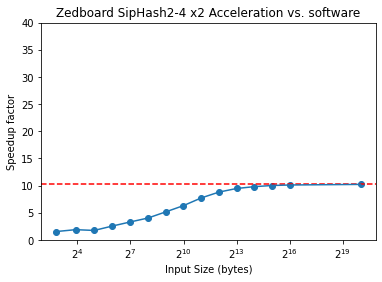

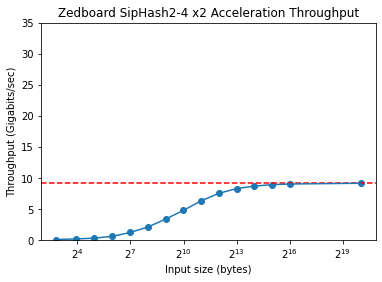

In [7]:
# SipHash2-4 x2
zedboard_throughput_24_x2, zedboard_speedup_24_x2 = graph_n_calc(zedboard_hw_24_x2_cycles, zedboard_sw_24_x2_cycles, input_sizes, "Zedboard SipHash2-4 x2")

-----------------------------------------------------
Profile of Zedboard SipHash2-4 x3:
-----------------------------------------------------

Acceleration vs. software:  14.008 times


Zedboard SipHash2-4 x3:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.074
      15		|  0.124
      31		|  0.261
      63		|  0.529
     127		|  0.947
     255		|  1.721
     511		|  3.162
    1023		|  5.515
    2047		|  7.850
    4095		|  9.791
    8191		|  11.510
   16383		|  12.356
   32767		|  12.970
   65535		|  13.237
 1048575		|  13.548

Zedboard SipHash2-4 x3 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.129		|	 0.111
	 0.217		|	 0.242
	 0.456		|	 0.492
	 0.926		|	 0.612
	 1.657		|	 1.041
	 3.012		|	 1.297
	 5.534		|	 1.468
	 9.651		|	 1.573
	 13.738		|	 1.632
	 17.134		|	 1.662
	 20.142		|	 1.678
	 21.623		|	 1.685
	 22.697		|	 1.689
	 23.165		|	 1.690
	 23.709		|	 1.693


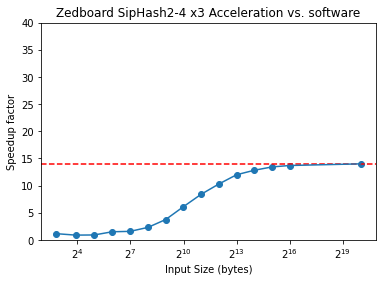

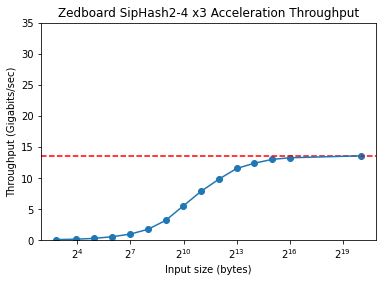

In [8]:
zedboard_throughput_24_x3, zedboard_speedup_24_x3 = graph_n_calc(zedboard_hw_24_x3_cycles, zedboard_sw_24_x3_cycles, input_sizes, "Zedboard SipHash2-4 x3")

-----------------------------------------------------
Profile of Zedboard SipHash2-4 x4:
-----------------------------------------------------

Acceleration vs. software:  18.646 times


Zedboard SipHash2-4 x4:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.078
      15		|  0.138
      31		|  0.288
      63		|  0.585
     127		|  1.171
     255		|  2.089
     511		|  4.201
    1023		|  6.837
    2047		|  9.768
    4095		|  12.666
    8191		|  14.906
   16383		|  16.288
   32767		|  17.198
   65535		|  17.625
 1048575		|  18.034

Zedboard SipHash2-4 x4 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.136		|	 0.126
	 0.242		|	 0.278
	 0.504		|	 0.541
	 1.024		|	 0.681
	 2.048		|	 1.100
	 3.656		|	 1.342
	 7.353		|	 1.494
	 11.965		|	 1.587
	 17.094		|	 1.640
	 22.165		|	 1.666
	 26.086		|	 1.679
	 28.505		|	 1.686
	 30.096		|	 1.689
	 30.844		|	 1.691
	 31.560		|	 1.693


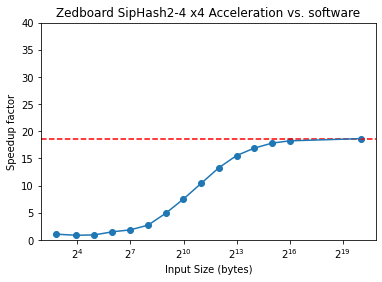

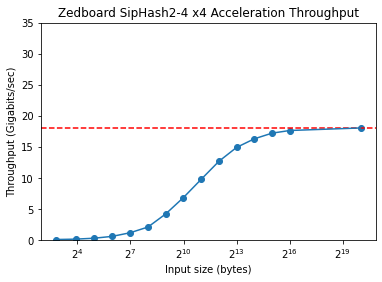

In [9]:
zedboard_throughput_24_x4, zedboard_speedup_24_x4 = graph_n_calc(zedboard_hw_24_x4_cycles, zedboard_sw_24_x4_cycles, input_sizes, "Zedboard SipHash2-4 x4")

-----------------------------------------------------
Profile of Zedboard SipHash1-3 x1:
-----------------------------------------------------

Acceleration vs. software:  2.825 times


Zedboard SipHash1-3 x1:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.080
      15		|  0.100
      31		|  0.207
      63		|  0.418
     127		|  0.855
     255		|  1.501
     511		|  2.378
    1023		|  3.471
    2047		|  4.690
    4095		|  5.688
    8191		|  6.359
   16383		|  6.720
   32767		|  6.900
   65535		|  6.997
 1048575		|  7.105

Zedboard SipHash1-3 x1 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.090		|	 0.056
	 0.112		|	 0.169
	 0.233		|	 0.403
	 0.470		|	 0.562
	 0.962		|	 1.198
	 1.689		|	 1.723
	 2.675		|	 2.147
	 3.905		|	 2.436
	 5.276		|	 2.621
	 6.398		|	 2.723
	 7.154		|	 2.776
	 7.560		|	 2.803
	 7.763		|	 2.817
	 7.872		|	 2.822
	 7.993		|	 2.830


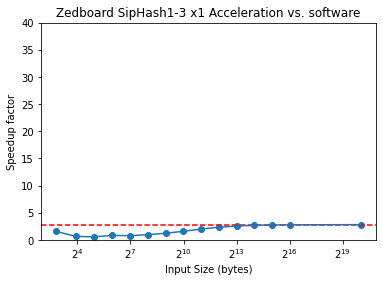

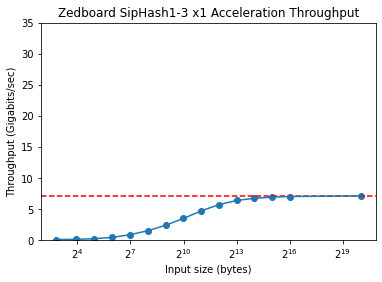

In [10]:
# SipHash1-3 x1:
zedboard_throughput_13_x1, zedboard_speedup_13_x1 = graph_n_calc(zedboard_hw_13_x1_cycles, zedboard_sw_13_x1_cycles, input_sizes, "Zedboard SipHash1-3 x1")

-----------------------------------------------------
Profile of Zedboard SipHash1-3 x2:
-----------------------------------------------------

Acceleration vs. software:  5.580 times


Zedboard SipHash1-3 x2:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.105
      15		|  0.171
      31		|  0.315
      63		|  0.640
     127		|  1.305
     255		|  2.349
     511		|  3.967
    1023		|  6.002
    2047		|  8.503
    4095		|  10.722
    8191		|  12.278
   16383		|  13.185
   32767		|  13.665
   65535		|  13.930
 1048575		|  14.039

Zedboard SipHash1-3 x2 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.119		|	 0.116
	 0.192		|	 0.316
	 0.354		|	 0.689
	 0.720		|	 0.906
	 1.468		|	 1.671
	 2.642		|	 2.107
	 4.463		|	 2.416
	 6.752		|	 2.613
	 9.565		|	 2.717
	 12.062		|	 2.773
	 13.813		|	 2.801
	 14.833		|	 2.815
	 15.373		|	 2.822
	 15.671		|	 2.825
	 15.794		|	 2.830


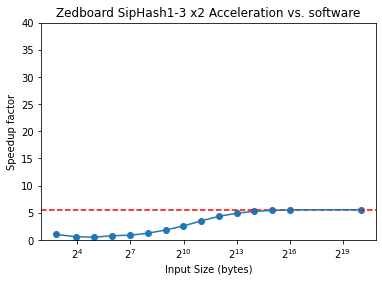

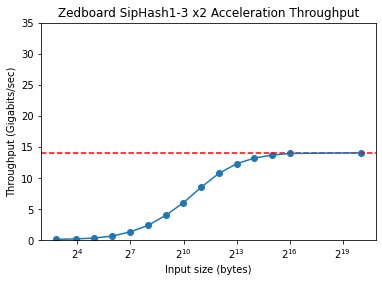

In [11]:
# SipHash1-3 x2:
zedboard_throughput_13_x2, zedboard_speedup_13_x2 = graph_n_calc(zedboard_hw_13_x2_cycles, zedboard_sw_13_x2_cycles, input_sizes, "Zedboard SipHash1-3 x2")

-----------------------------------------------------
Profile of Zedboard SipHash1-3 x3:
-----------------------------------------------------

Acceleration vs. software:  12.561 times


Zedboard SipHash1-3 x3:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.108
      15		|  0.184
      31		|  0.381
      63		|  0.774
     127		|  1.561
     255		|  2.822
     511		|  5.221
    1023		|  7.907
    2047		|  11.739
    4095		|  15.062
    8191		|  17.432
   16383		|  19.136
   32767		|  20.119
   65535		|  20.596
 1048575		|  21.068

Zedboard SipHash1-3 x3 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.121		|	 0.098
	 0.207		|	 0.205
	 0.429		|	 0.423
	 0.871		|	 0.610
	 1.756		|	 1.030
	 3.174		|	 1.335
	 5.874		|	 1.558
	 8.896		|	 1.709
	 13.206		|	 1.793
	 16.945		|	 1.839
	 19.611		|	 1.863
	 21.528		|	 1.875
	 22.634		|	 1.880
	 23.171		|	 1.883
	 23.701		|	 1.887


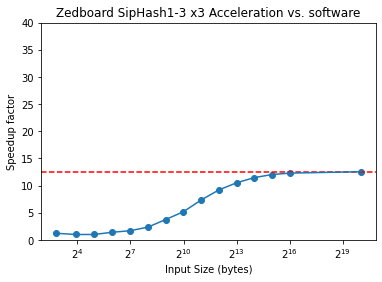

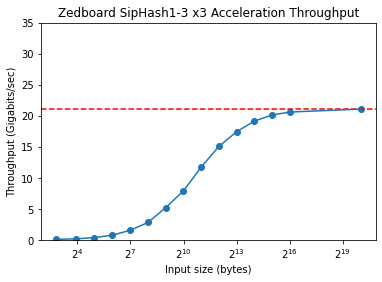

In [12]:
# SipHash1-3 x3:
zedboard_throughput_13_x3, zedboard_speedup_13_x3 = graph_n_calc(zedboard_hw_13_x3_cycles, zedboard_sw_13_x3_cycles, input_sizes, "Zedboard SipHash1-3 x3")

-----------------------------------------------------
Profile of Zedboard SipHash1-3 x4:
-----------------------------------------------------

Acceleration vs. software:  16.742 times


Zedboard SipHash1-3 x4:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.138
      15		|  0.237
      31		|  0.446
      63		|  0.926
     127		|  1.866
     255		|  3.421
     511		|  5.918
    1023		|  9.965
    2047		|  15.007
    4095		|  19.544
    8191		|  22.914
   16383		|  25.293
   32767		|  26.581
   65535		|  27.327
 1048575		|  28.078

Zedboard SipHash1-3 x4 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.155		|	 0.117
	 0.267		|	 0.233
	 0.502		|	 0.471
	 1.041		|	 0.676
	 2.099		|	 1.092
	 3.849		|	 1.382
	 6.658		|	 1.586
	 11.211		|	 1.725
	 16.882		|	 1.802
	 21.987		|	 1.844
	 25.778		|	 1.866
	 28.455		|	 1.876
	 29.904		|	 1.881
	 30.742		|	 1.884
	 31.588		|	 1.887


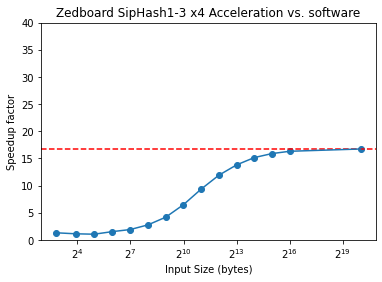

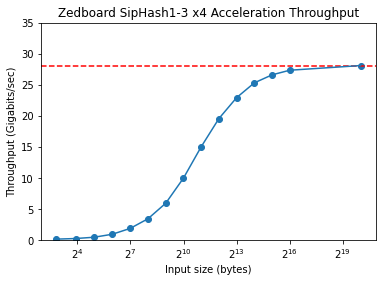

In [13]:
zedboard_throughput_13_x4, zedboard_speedup_13_x4 = graph_n_calc(zedboard_hw_13_x4_cycles, zedboard_sw_13_x4_cycles, input_sizes, "Zedboard SipHash1-3 x4")

-----------------------------------------------------
Profile of Zedboard SipHash2-4 x5:
-----------------------------------------------------

Acceleration vs. software:  23.272 times


Zedboard SipHash2-4 x5:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.069
      15		|  0.127
      31		|  0.263
      63		|  0.535
     127		|  1.083
     255		|  2.174
     511		|  3.932
    1023		|  6.622
    2047		|  10.114
    4095		|  13.404
    8191		|  16.164
   16383		|  18.210
   32767		|  19.313
   65535		|  19.919
 1048575		|  20.508

Zedboard SipHash2-4 x5 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.132		|	 0.154
	 0.243		|	 0.361
	 0.505		|	 0.686
	 1.026		|	 0.814
	 2.075		|	 1.238
	 4.167		|	 1.428
	 7.537		|	 1.542
	 12.692		|	 1.612
	 19.384		|	 1.650
	 25.690		|	 1.668
	 30.980		|	 1.680
	 34.902		|	 1.685
	 37.016		|	 1.687
	 38.177		|	 1.688
	 39.306		|	 1.689


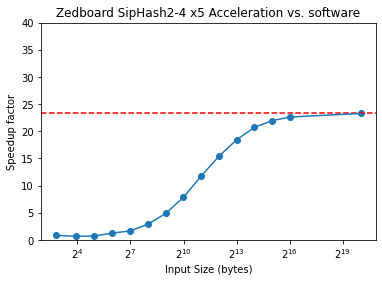

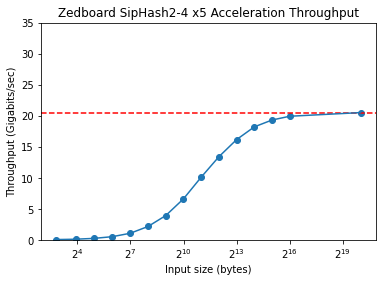

In [14]:
zedboard_throughput_24_x5, zedboard_speedup_24_x5 = graph_n_calc(zedmux_hw_24_x5_cycles, zedmux_sw_24_x5_cycles, input_sizes, "Zedboard SipHash2-4 x5")

-----------------------------------------------------
Profile of Zedboard SipHash2-4 x6:
-----------------------------------------------------

Acceleration vs. software:  27.875 times


Zedboard SipHash2-4 x6:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.070
      15		|  0.133
      31		|  0.274
      63		|  0.556
     127		|  1.120
     255		|  2.255
     511		|  4.506
    1023		|  7.482
    2047		|  11.588
    4095		|  15.945
    8191		|  19.367
   16383		|  21.631
   32767		|  23.046
   65535		|  23.828
 1048575		|  24.573

Zedboard SipHash2-4 x6 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.134		|	 0.158
	 0.254		|	 0.377
	 0.525		|	 0.702
	 1.065		|	 0.827
	 2.146		|	 1.247
	 4.322		|	 1.434
	 8.637		|	 1.549
	 14.341		|	 1.617
	 22.210		|	 1.654
	 30.560		|	 1.672
	 37.119		|	 1.684
	 41.458		|	 1.689
	 44.170		|	 1.690
	 45.669		|	 1.688
	 47.097		|	 1.690


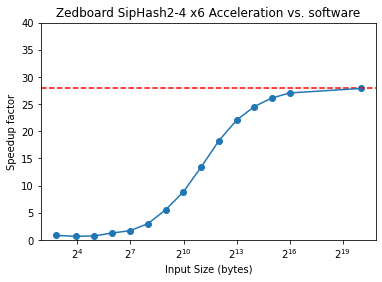

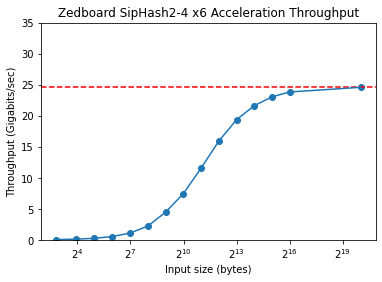

In [15]:
zedboard_throughput_24_x6, zedboard_speedup_24_x6 = graph_n_calc(zedmux_hw_24_x6_cycles, zedmux_sw_24_x6_cycles, input_sizes, "Zedboard SipHash2-4 x6")

-----------------------------------------------------
Profile of Zedboard SipHash2-4 x7:
-----------------------------------------------------

Acceleration vs. software:  32.512 times


Zedboard SipHash2-4 x7:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.072
      15		|  0.138
      31		|  0.284
      63		|  0.581
     127		|  1.168
     255		|  2.340
     511		|  4.689
    1023		|  8.230
    2047		|  12.957
    4095		|  18.107
    8191		|  21.852
   16383		|  24.983
   32767		|  26.594
   65535		|  27.664
 1048575		|  28.624

Zedboard SipHash2-4 x7 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.138		|	 0.173
	 0.264		|	 0.401
	 0.545		|	 0.711
	 1.114		|	 0.880
	 2.239		|	 1.256
	 4.485		|	 1.438
	 8.987		|	 1.549
	 15.773		|	 1.617
	 24.834		|	 1.653
	 34.703		|	 1.670
	 41.882		|	 1.679
	 47.884		|	 1.683
	 50.971		|	 1.685
	 53.022		|	 1.686
	 54.862		|	 1.687


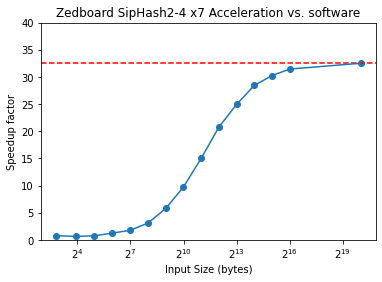

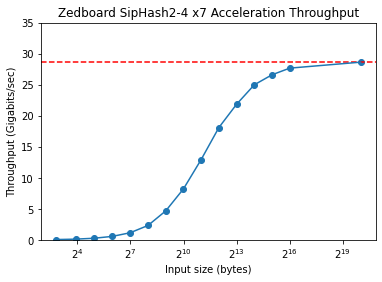

In [16]:
zedboard_throughput_24_x7, zedboard_speedup_24_x7 = graph_n_calc(zedmux_hw_24_x7_cycles, zedmux_sw_24_x7_cycles, input_sizes, "Zedboard SipHash2-4 x7")

-----------------------------------------------------
Profile of Zedboard SipHash2-4 x8:
-----------------------------------------------------

Acceleration vs. software:  36.889 times


Zedboard SipHash2-4 x8:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.073
      15		|  0.140
      31		|  0.292
      63		|  0.592
     127		|  1.197
     255		|  2.403
     511		|  4.804
    1023		|  8.971
    2047		|  14.099
    4095		|  19.875
    8191		|  24.438
   16383		|  27.911
   32767		|  30.066
   65535		|  31.266
 1048575		|  32.491

Zedboard SipHash2-4 x8 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.139		|	 0.187
	 0.269		|	 0.403
	 0.560		|	 0.717
	 1.135		|	 1.120
	 2.293		|	 1.265
	 4.605		|	 1.441
	 9.207		|	 1.556
	 17.193		|	 1.620
	 27.023		|	 1.654
	 38.093		|	 1.671
	 46.839		|	 1.680
	 53.496		|	 1.684
	 57.625		|	 1.686
	 59.925		|	 1.687
	 62.272		|	 1.688


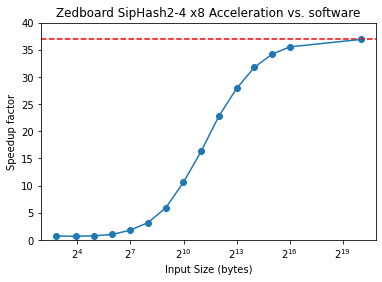

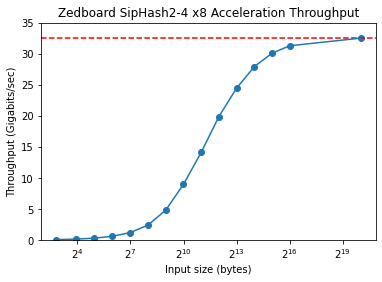

In [17]:
zedboard_throughput_24_x8, zedboard_speedup_24_x8 = graph_n_calc(zedmux_hw_24_x8_cycles, zedmux_sw_24_x8_cycles, input_sizes, "Zedboard SipHash2-4 x8")

-----------------------------------------------------
Profile of Zedboard SipHash1-3 x5:
-----------------------------------------------------

Acceleration vs. software:  14.904 times


Zedboard SipHash1-3 x5:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.099
      15		|  0.185
      31		|  0.386
      63		|  0.780
     127		|  1.569
     255		|  3.177
     511		|  5.794
    1023		|  9.636
    2047		|  14.971
    4095		|  18.892
    8191		|  22.649
   16383		|  24.997
   32767		|  26.323
   65535		|  26.989
 1048575		|  24.105

Zedboard SipHash1-3 x5 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.116		|	 0.130
	 0.216		|	 0.252
	 0.451		|	 0.498
	 0.910		|	 0.686
	 1.830		|	 1.120
	 3.706		|	 1.417
	 6.759		|	 1.611
	 11.242		|	 1.741
	 17.466		|	 1.811
	 22.040		|	 1.849
	 26.423		|	 1.868
	 29.162		|	 1.877
	 30.709		|	 1.881
	 31.486		|	 1.884
	 28.121		|	 1.887


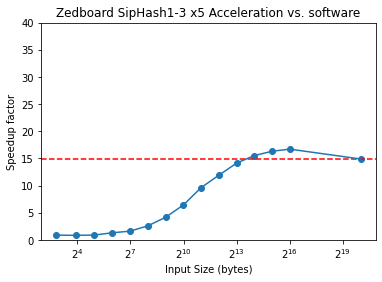

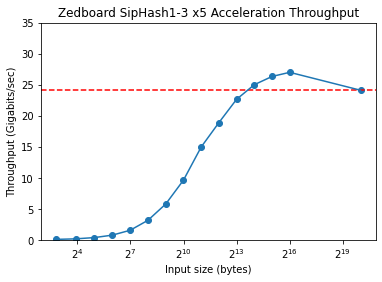

In [18]:
zedboard_throughput_13_x5, zedboard_speedup_13_x5 = graph_n_calc(zedmux_hw_13_x5_cycles, zedmux_sw_13_x5_cycles, input_sizes, "Zedboard SipHash1-3 x5")

-----------------------------------------------------
Profile of Zedboard SipHash1-3 x6:
-----------------------------------------------------

Acceleration vs. software:  18.751 times


Zedboard SipHash1-3 x6:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.102
      15		|  0.192
      31		|  0.403
      63		|  0.824
     127		|  1.645
     255		|  3.303
     511		|  6.687
    1023		|  10.938
    2047		|  16.899
    4095		|  21.938
    8191		|  25.640
   16383		|  28.777
   32767		|  30.223
   65535		|  30.747
 1048575		|  30.327

Zedboard SipHash1-3 x6 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.119		|	 0.143
	 0.224		|	 0.270
	 0.470		|	 0.518
	 0.962		|	 0.749
	 1.919		|	 1.149
	 3.854		|	 1.438
	 7.802		|	 1.621
	 12.761		|	 1.748
	 19.714		|	 1.814
	 25.594		|	 1.850
	 29.912		|	 1.868
	 33.572		|	 1.878
	 35.259		|	 1.882
	 35.870		|	 1.884
	 35.380		|	 1.887


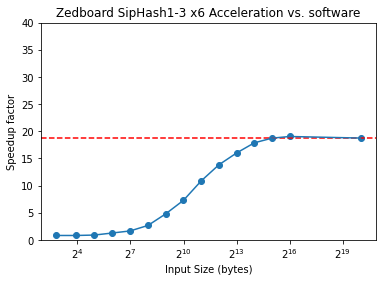

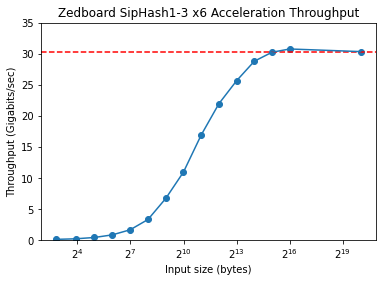

In [19]:
zedboard_throughput_13_x6, zedboard_speedup_13_x6 = graph_n_calc(zedmux_hw_13_x6_cycles, zedmux_sw_13_x6_cycles, input_sizes, "Zedboard SipHash1-3 x6")

-----------------------------------------------------
Profile of Zedboard SipHash1-3 x7:
-----------------------------------------------------

Acceleration vs. software:  18.587 times


Zedboard SipHash1-3 x7:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.104
      15		|  0.202
      31		|  0.419
      63		|  0.848
     127		|  1.705
     255		|  3.438
     511		|  6.859
    1023		|  12.553
    2047		|  17.597
    4095		|  22.056
    8191		|  25.867
   16383		|  28.264
   32767		|  29.619
   65535		|  30.391
 1048575		|  30.060

Zedboard SipHash1-3 x7 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.122		|	 0.149
	 0.235		|	 0.287
	 0.489		|	 0.541
	 0.989		|	 0.774
	 1.989		|	 1.179
	 4.011		|	 1.452
	 8.002		|	 1.636
	 14.644		|	 1.755
	 20.529		|	 1.817
	 25.732		|	 1.852
	 30.177		|	 1.869
	 32.973		|	 1.878
	 34.554		|	 1.882
	 35.454		|	 1.884
	 35.069		|	 1.887


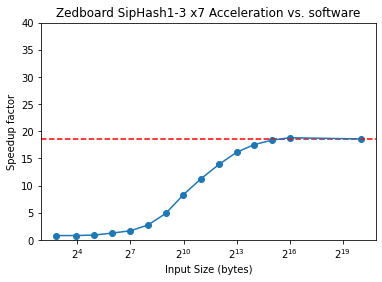

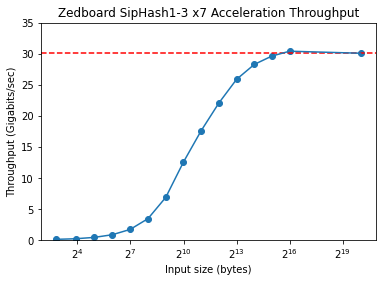

In [20]:
zedboard_throughput_13_x7, zedboard_speedup_13_x7 = graph_n_calc(zedmux_hw_13_x7_cycles, zedmux_sw_13_x7_cycles, input_sizes, "Zedboard SipHash1-3 x7")

-----------------------------------------------------
Profile of Zedboard SipHash1-3 x8:
-----------------------------------------------------

Acceleration vs. software:  20.559 times


Zedboard SipHash1-3 x8:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.106
      15		|  0.206
      31		|  0.427
      63		|  0.873
     127		|  1.763
     255		|  3.504
     511		|  7.022
    1023		|  12.967
    2047		|  19.176
    4095		|  23.980
    8191		|  27.959
   16383		|  30.380
   32767		|  31.777
   65535		|  32.567
 1048575		|  33.251

Zedboard SipHash1-3 x8 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.124		|	 0.157
	 0.240		|	 0.299
	 0.498		|	 0.560
	 1.018		|	 0.794
	 2.057		|	 1.195
	 4.088		|	 1.466
	 8.192		|	 1.641
	 15.128		|	 1.757
	 22.372		|	 1.820
	 27.976		|	 1.853
	 32.617		|	 1.870
	 35.442		|	 1.879
	 37.072		|	 1.882
	 37.994		|	 1.884
	 38.792		|	 1.887


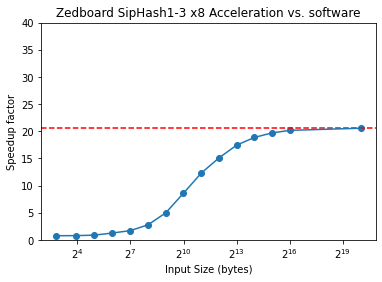

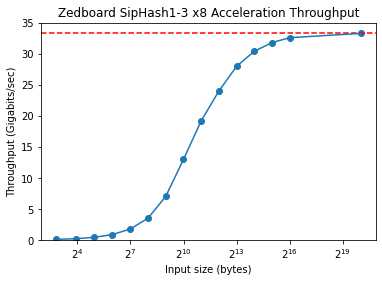

In [21]:
zedboard_throughput_13_x8, zedboard_speedup_13_x8 = graph_n_calc(zedmux_hw_13_x8_cycles, zedmux_sw_13_x8_cycles, input_sizes, "Zedboard SipHash1-3 x8")

[]

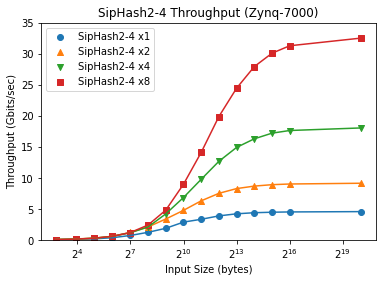

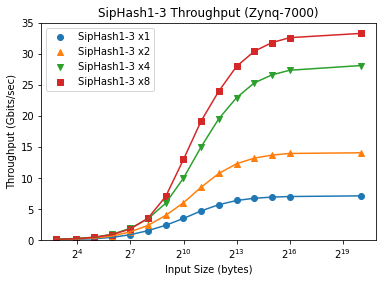

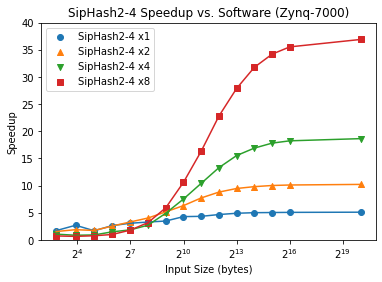

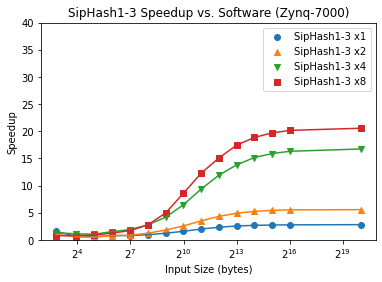

In [59]:
#Graph all data together:

fig = plt.figure()
plt.title("SipHash2-4 Throughput (Zynq-7000)")
plt.ylabel("Throughput (Gbits/sec)")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zedboard_throughput_24_x1, label = 'SipHash2-4 x1', linestyle = 'solid')
plt.plot(input_sizes, zedboard_throughput_24_x1)
plt.scatter(input_sizes, zedboard_throughput_24_x2, label = 'SipHash2-4 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zedboard_throughput_24_x2)
plt.scatter(input_sizes, zedboard_throughput_24_x4, label = 'SipHash2-4 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zedboard_throughput_24_x4)
plt.scatter(input_sizes, zedboard_throughput_24_x8, label = 'SipHash2-4 x8', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zedboard_throughput_24_x8)
plt.ylim(0, 35)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

fig = plt.figure()
plt.title("SipHash1-3 Throughput (Zynq-7000)")
plt.ylabel("Throughput (Gbits/sec)")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zedboard_throughput_13_x1, label = 'SipHash1-3 x1', linestyle = 'solid')
plt.plot(input_sizes, zedboard_throughput_13_x1)
plt.scatter(input_sizes, zedboard_throughput_13_x2, label = 'SipHash1-3 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zedboard_throughput_13_x2)
plt.scatter(input_sizes, zedboard_throughput_13_x4, label = 'SipHash1-3 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zedboard_throughput_13_x4)
plt.scatter(input_sizes, zedboard_throughput_13_x8, label = 'SipHash1-3 x8', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zedboard_throughput_13_x8)
plt.ylim(0, 35)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

# Speedup graphs (TODO)

fig = plt.figure()
plt.title("SipHash2-4 Speedup vs. Software (Zynq-7000)")
plt.ylabel("Speedup")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zedboard_speedup_24_x1, label = 'SipHash2-4 x1', linestyle = 'solid')
plt.plot(input_sizes, zedboard_speedup_24_x1)
plt.scatter(input_sizes, zedboard_speedup_24_x2, label = 'SipHash2-4 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zedboard_speedup_24_x2)
plt.scatter(input_sizes, zedboard_speedup_24_x4, label = 'SipHash2-4 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zedboard_speedup_24_x4)
plt.scatter(input_sizes, zedboard_speedup_24_x8, label = 'SipHash2-4 x8', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zedboard_speedup_24_x8)
plt.ylim(0, 40)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

fig = plt.figure()
plt.title("SipHash1-3 Speedup vs. Software (Zynq-7000)")
plt.ylabel("Speedup")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zedboard_speedup_13_x1, label = 'SipHash1-3 x1', linestyle = 'solid')
plt.plot(input_sizes, zedboard_speedup_13_x1)
plt.scatter(input_sizes, zedboard_speedup_13_x2, label = 'SipHash1-3 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zedboard_speedup_13_x2)
plt.scatter(input_sizes, zedboard_speedup_13_x4, label = 'SipHash1-3 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zedboard_speedup_13_x4)
plt.scatter(input_sizes, zedboard_speedup_13_x8, label = 'SipHash1-3 x8', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zedboard_speedup_13_x8)
plt.ylim(0, 40)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

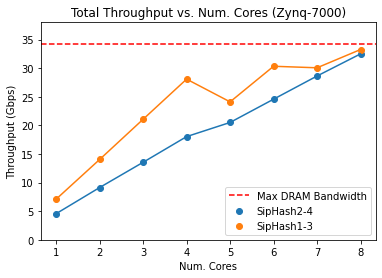

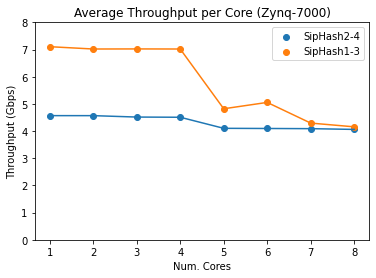

In [60]:
zed_24_asympt_tput_totals = [zedboard_throughput_24_x1[14], zedboard_throughput_24_x2[14], zedboard_throughput_24_x3[14], zedboard_throughput_24_x4[14], zedboard_throughput_24_x5[14], zedboard_throughput_24_x6[14], zedboard_throughput_24_x7[14], zedboard_throughput_24_x8[14]]
zed_24_asympt_tput_ave = [zedboard_throughput_24_x1[14], zedboard_throughput_24_x2[14] / 2, zedboard_throughput_24_x3[14] / 3, zedboard_throughput_24_x4[14] / 4, zedboard_throughput_24_x5[14] / 5, zedboard_throughput_24_x6[14] / 6, zedboard_throughput_24_x7[14] / 7, zedboard_throughput_24_x8[14] / 8]

zed_13_asympt_tput_totals = [zedboard_throughput_13_x1[14], zedboard_throughput_13_x2[14], zedboard_throughput_13_x3[14], zedboard_throughput_13_x4[14], zedboard_throughput_13_x5[14], zedboard_throughput_13_x6[14], zedboard_throughput_13_x7[14], zedboard_throughput_13_x8[14]]
zed_13_asympt_tput_ave = [zedboard_throughput_13_x1[14], zedboard_throughput_13_x2[14] / 2, zedboard_throughput_13_x3[14] / 3, zedboard_throughput_13_x4[14] / 4, zedboard_throughput_13_x5[14] / 5, zedboard_throughput_13_x6[14] / 6, zedboard_throughput_13_x7[14] / 7, zedboard_throughput_13_x8[14] / 8]

n = [1, 2, 3, 4, 5, 6, 7, 8]

plt.scatter(n, zed_24_asympt_tput_totals, label = "SipHash2-4")
plt.scatter(n, zed_13_asympt_tput_totals, label = "SipHash1-3")
plt.plot(n, zed_24_asympt_tput_totals)
plt.plot(n, zed_13_asympt_tput_totals)
plt.title("Total Throughput vs. Num. Cores (Zynq-7000)")
plt.xlabel("Num. Cores")
plt.ylabel("Throughput (Gbps)")
plt.ylim(0, 38)
plt.axhline(34.2, linestyle = "--", color = 'r', label = "Max DRAM Bandwidth")
plt.legend()
plt.show()

plt.scatter(n, zed_24_asympt_tput_ave, label = "SipHash2-4")
plt.scatter(n, zed_13_asympt_tput_ave, label = "SipHash1-3")
plt.plot(n, zed_24_asympt_tput_ave)
plt.plot(n, zed_13_asympt_tput_ave)
plt.title("Average Throughput per Core (Zynq-7000)")
plt.xlabel("Num. Cores")
plt.ylabel("Throughput (Gbps)")
plt.ylim(0, 8)
plt.legend()
plt.show()

ZCU 106

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x1:
-----------------------------------------------------

Acceleration vs. software:  2.621 times


ZCU106 SipHash2-4 x1:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.088
      15		|  0.151
      31		|  0.313
      63		|  0.458
     127		|  1.083
     255		|  2.153
     511		|  3.743
    1023		|  5.885
    2047		|  7.176
    4095		|  10.293
    8191		|  11.730
   16383		|  12.269
   32767		|  12.748
   65535		|  12.933
 1048575		|  13.183

ZCU106 SipHash2-4 x1 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.051		|	 0.033
	 0.088		|	 0.195
	 0.182		|	 0.508
	 0.267		|	 0.685
	 0.632		|	 1.124
	 1.256		|	 1.635
	 2.184		|	 2.103
	 3.433		|	 2.630
	 4.186		|	 2.796
	 6.004		|	 2.886
	 6.843		|	 2.911
	 7.157		|	 2.934
	 7.437		|	 2.942
	 7.545		|	 2.867
	 7.691		|	 2.935


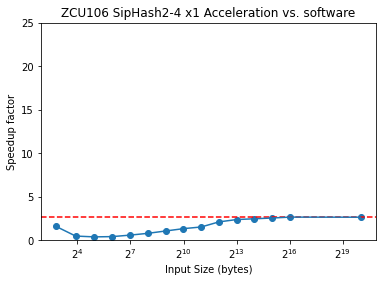

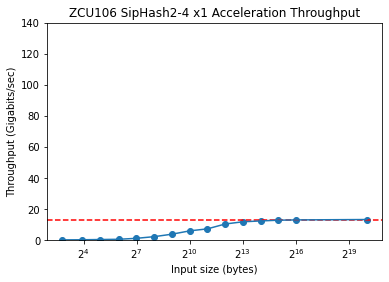

In [24]:
zcu106_throughput_24_x1, zcu106_speedup_24_x1 = graph_n_calc(zcu106_hw_24_x1_cycles, zcu106_sw_24_x1_cycles, input_sizes, "ZCU106 SipHash2-4 x1")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x2:
-----------------------------------------------------

Acceleration vs. software:  5.313 times


ZCU106 SipHash2-4 x2:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.142
      15		|  0.239
      31		|  0.499
      63		|  1.019
     127		|  2.054
     255		|  3.497
     511		|  6.279
    1023		|  10.166
    2047		|  14.743
    4095		|  19.101
    8191		|  22.393
   16383		|  24.220
   32767		|  25.137
   65535		|  25.754
 1048575		|  26.357

ZCU106 SipHash2-4 x2 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.083		|	 0.055
	 0.140		|	 0.288
	 0.291		|	 0.729
	 0.594		|	 0.969
	 1.198		|	 1.468
	 2.040		|	 1.821
	 3.663		|	 2.523
	 5.930		|	 2.735
	 8.601		|	 2.855
	 11.143		|	 2.852
	 13.064		|	 2.917
	 14.129		|	 2.955
	 14.664		|	 2.946
	 15.024		|	 2.960
	 15.376		|	 2.894


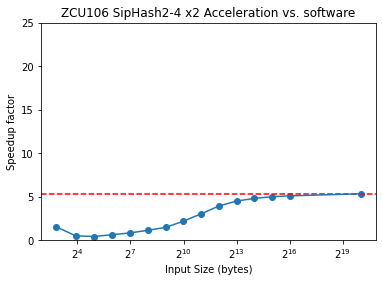

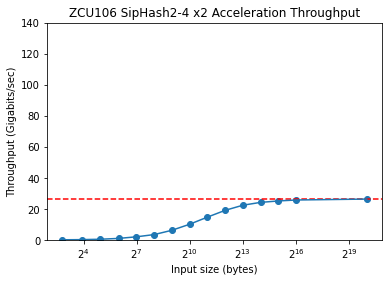

In [25]:
zcu106_throughput_24_x2, zcu106_speedup_24_x2 = graph_n_calc(zcu106_hw_24_x2_cycles, zcu106_sw_24_x2_cycles, input_sizes, "ZCU106 SipHash2-4 x2")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x3:
-----------------------------------------------------

Acceleration vs. software:  7.801 times


ZCU106 SipHash2-4 x3:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.187
      15		|  0.302
      31		|  0.625
      63		|  1.270
     127		|  2.571
     255		|  4.553
     511		|  6.773
    1023		|  13.594
    2047		|  20.401
    4095		|  28.304
    8191		|  31.018
   16383		|  35.593
   32767		|  37.379
   65535		|  38.432
 1048575		|  39.435

ZCU106 SipHash2-4 x3 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.109		|	 0.106
	 0.176		|	 0.290
	 0.365		|	 0.655
	 0.741		|	 0.931
	 1.500		|	 1.443
	 2.656		|	 1.861
	 3.951		|	 2.453
	 7.930		|	 2.692
	 11.901		|	 2.835
	 16.512		|	 2.909
	 18.095		|	 2.938
	 20.764		|	 2.946
	 21.806		|	 2.941
	 22.420		|	 2.949
	 23.005		|	 2.949


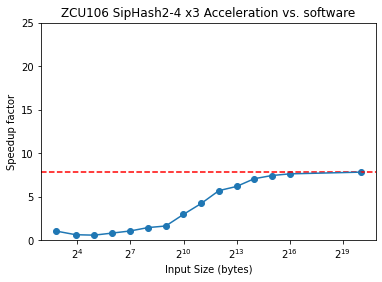

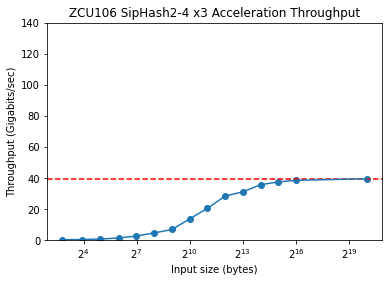

In [26]:
zcu106_throughput_24_x3, zcu106_speedup_24_x3 = graph_n_calc(zcu106_hw_24_x3_cycles, zcu106_sw_24_x3_cycles, input_sizes, "ZCU106 SipHash2-4 x3")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x4:
-----------------------------------------------------

Acceleration vs. software:  10.459 times


ZCU106 SipHash2-4 x4:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.207
      15		|  0.344
      31		|  0.721
      63		|  1.474
     127		|  2.962
     255		|  5.927
     511		|  9.706
    1023		|  17.668
    2047		|  26.684
    4095		|  34.536
    8191		|  40.318
   16383		|  46.476
   32767		|  49.542
   65535		|  51.156
 1048575		|  52.586

ZCU106 SipHash2-4 x4 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.121		|	 0.130
	 0.201		|	 0.345
	 0.420		|	 0.743
	 0.860		|	 1.050
	 1.728		|	 1.573
	 3.458		|	 1.984
	 5.662		|	 2.514
	 10.307		|	 2.735
	 15.567		|	 2.854
	 20.148		|	 2.885
	 23.520		|	 2.934
	 27.113		|	 2.949
	 28.901		|	 2.964
	 29.843		|	 2.956
	 30.677		|	 2.933


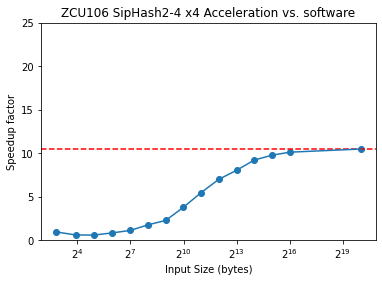

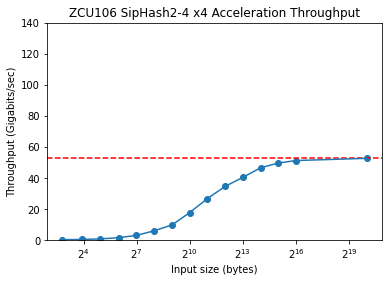

In [27]:
zcu106_throughput_24_x4, zcu106_speedup_24_x4 = graph_n_calc(zcu106_hw_24_x4_cycles, zcu106_sw_24_x4_cycles, input_sizes, "ZCU106 SipHash2-4 x4")

-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x1:
-----------------------------------------------------

Acceleration vs. software:  1.603 times


ZCU106 SipHash1-3 x1:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.086
      15		|  0.149
      31		|  0.313
      63		|  0.639
     127		|  1.078
     255		|  2.153
     511		|  3.712
    1023		|  5.787
    2047		|  8.141
    4095		|  10.158
    8191		|  11.004
   16383		|  12.147
   32767		|  12.685
   65535		|  12.915
 1048575		|  13.183

ZCU106 SipHash1-3 x1 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.050		|	 0.041
	 0.087		|	 0.306
	 0.182		|	 0.585
	 0.373		|	 0.741
	 0.629		|	 1.337
	 1.256		|	 2.125
	 2.165		|	 3.476
	 3.376		|	 3.734
	 4.749		|	 4.499
	 5.926		|	 4.723
	 6.419		|	 4.779
	 7.086		|	 4.768
	 7.400		|	 4.845
	 7.534		|	 4.867
	 7.691		|	 4.797


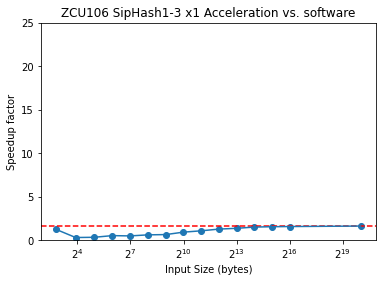

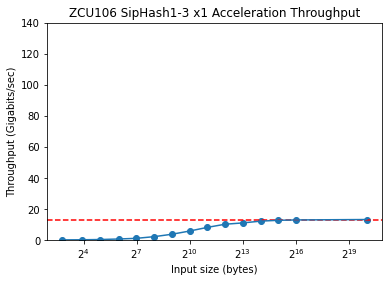

In [28]:
zcu106_throughput_13_x1, zcu106_speedup_13_x1 = graph_n_calc(zcu106_hw_13_x1_cycles, zcu106_sw_13_x1_cycles, input_sizes, "ZCU106 SipHash1-3 x1")

-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x2:
-----------------------------------------------------

Acceleration vs. software:  3.143 times


ZCU106 SipHash1-3 x2:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.161
      15		|  0.237
      31		|  0.501
      63		|  1.019
     127		|  2.044
     255		|  3.554
     511		|  6.212
    1023		|  10.195
    2047		|  14.805
    4095		|  19.127
    8191		|  22.429
   16383		|  24.137
   32767		|  25.165
   65535		|  25.622
 1048575		|  26.354

ZCU106 SipHash1-3 x2 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.094		|	 0.067
	 0.138		|	 0.448
	 0.292		|	 0.827
	 0.594		|	 1.125
	 1.192		|	 1.881
	 2.073		|	 2.440
	 3.624		|	 3.871
	 5.948		|	 4.353
	 8.637		|	 4.642
	 11.158		|	 4.804
	 13.085		|	 4.848
	 14.081		|	 4.876
	 14.681		|	 4.721
	 14.947		|	 4.748
	 15.374		|	 4.891


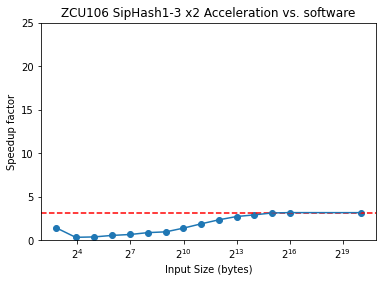

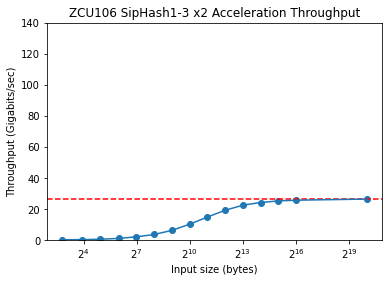

In [29]:
zcu106_throughput_13_x2, zcu106_speedup_13_x2 = graph_n_calc(zcu106_hw_13_x2_cycles, zcu106_sw_13_x2_cycles, input_sizes, "ZCU106 SipHash1-3 x2")

-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x3:
-----------------------------------------------------

Acceleration vs. software:  4.683 times


ZCU106 SipHash1-3 x3:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.188
      15		|  0.302
      31		|  0.630
      63		|  1.281
     127		|  2.571
     255		|  4.585
     511		|  8.238
    1023		|  13.524
    2047		|  20.401
    4095		|  25.190
    8191		|  32.805
   16383		|  35.459
   32767		|  37.454
   65535		|  38.454
 1048575		|  39.429

ZCU106 SipHash1-3 x3 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.110		|	 0.124
	 0.176		|	 0.391
	 0.368		|	 0.721
	 0.747		|	 1.099
	 1.500		|	 1.814
	 2.675		|	 2.444
	 4.806		|	 3.694
	 7.889		|	 4.233
	 11.901		|	 4.583
	 14.695		|	 4.771
	 19.138		|	 4.848
	 20.686		|	 4.876
	 21.850		|	 4.738
	 22.433		|	 4.876
	 23.002		|	 4.912


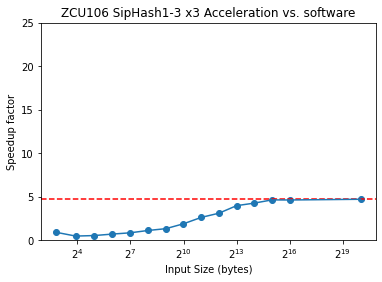

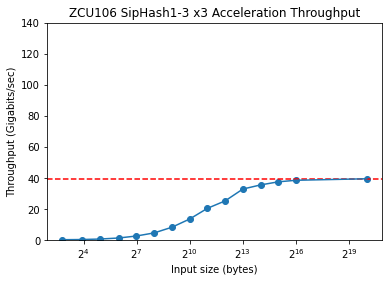

In [30]:
zcu106_throughput_13_x3, zcu106_speedup_13_x3 = graph_n_calc(zcu106_hw_13_x3_cycles, zcu106_sw_13_x3_cycles, input_sizes, "ZCU106 SipHash1-3 x3")

-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x4:
-----------------------------------------------------

Acceleration vs. software:  6.231 times


ZCU106 SipHash1-3 x4:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.205
      15		|  0.344
      31		|  0.721
      63		|  1.469
     127		|  2.952
     255		|  5.947
     511		|  10.617
    1023		|  14.228
    2047		|  26.633
    4095		|  35.814
    8191		|  43.336
   16383		|  47.040
   32767		|  49.465
   65535		|  51.034
 1048575		|  52.611

ZCU106 SipHash1-3 x4 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.120		|	 0.154
	 0.201		|	 0.455
	 0.420		|	 0.832
	 0.857		|	 1.266
	 1.722		|	 1.992
	 3.469		|	 2.727
	 6.194		|	 3.799
	 8.300		|	 4.335
	 15.537		|	 4.634
	 20.893		|	 4.796
	 25.281		|	 4.868
	 27.442		|	 4.895
	 28.857		|	 4.894
	 29.772		|	 4.881
	 30.692		|	 4.926


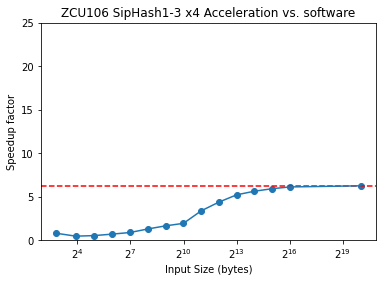

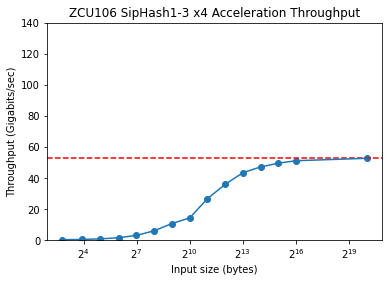

In [31]:
zcu106_throughput_13_x4, zcu106_speedup_13_x4 = graph_n_calc(zcu106_hw_13_x4_cycles, zcu106_sw_13_x4_cycles, input_sizes, "ZCU106 SipHash1-3 x4")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x5:
-----------------------------------------------------

Acceleration vs. software:  8.306 times


ZCU106 SipHash2-4 x5:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.198
      15		|  0.344
      31		|  0.715
      63		|  1.449
     127		|  2.921
     255		|  5.881
     511		|  9.948
    1023		|  17.118
    2047		|  25.676
    4095		|  34.189
    8191		|  40.037
   16383		|  45.707
   32767		|  47.599
   65535		|  49.284
 1048575		|  50.750

ZCU106 SipHash2-4 x5 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.126		|	 0.192
	 0.219		|	 0.463
	 0.455		|	 0.951
	 0.921		|	 1.400
	 1.857		|	 2.068
	 3.739		|	 2.724
	 6.324		|	 3.288
	 10.883		|	 3.572
	 16.324		|	 3.731
	 21.736		|	 3.768
	 25.454		|	 3.846
	 29.058		|	 3.871
	 30.261		|	 3.865
	 31.332		|	 3.852
	 32.264		|	 3.885


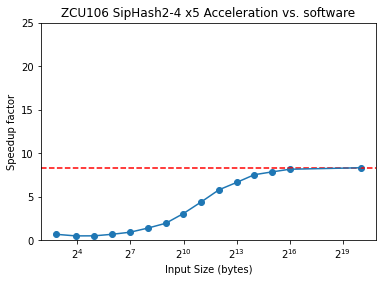

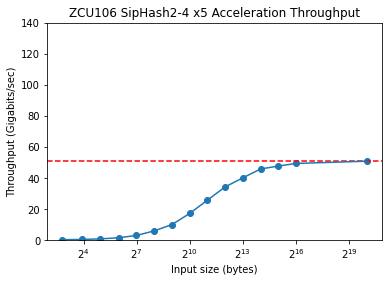

In [32]:
zcu106_throughput_24_x5, zcu106_speedup_24_x5 = graph_n_calc(zcumux_hw_24_x5_cycles, zcumux_sw_24_x5_cycles, input_sizes, "ZCU106 SipHash2-4 x5")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x6:
-----------------------------------------------------

Acceleration vs. software:  9.933 times


ZCU106 SipHash2-4 x6:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.206
      15		|  0.403
      31		|  0.834
      63		|  1.684
     127		|  3.121
     255		|  6.284
     511		|  10.693
    1023		|  18.857
    2047		|  28.791
    4095		|  38.076
    8191		|  46.879
   16383		|  53.575
   32767		|  56.805
   65535		|  58.888
 1048575		|  60.642

ZCU106 SipHash2-4 x6 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.131		|	 0.215
	 0.256		|	 0.508
	 0.530		|	 1.028
	 1.071		|	 1.500
	 1.984		|	 2.171
	 3.995		|	 2.807
	 6.798		|	 3.333
	 11.988		|	 3.598
	 18.304		|	 3.745
	 24.207		|	 3.813
	 29.804		|	 3.856
	 34.060		|	 3.872
	 36.114		|	 3.868
	 37.438		|	 3.859
	 38.553		|	 3.881


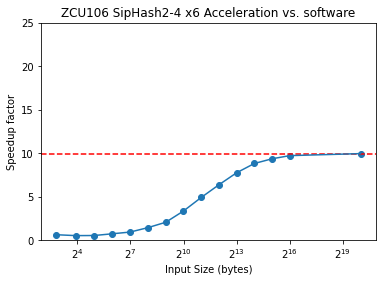

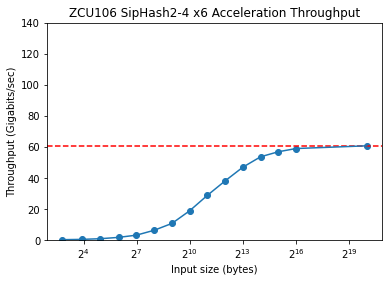

In [33]:
zcu106_throughput_24_x6, zcu106_speedup_24_x6 = graph_n_calc(zcumux_hw_24_x6_cycles, zcumux_sw_24_x6_cycles, input_sizes, "ZCU106 SipHash2-4 x6")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x7:
-----------------------------------------------------

Acceleration vs. software:  11.395 times


ZCU106 SipHash2-4 x7:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.233
      15		|  0.419
      31		|  0.866
      63		|  1.761
     127		|  3.549
     255		|  6.575
     511		|  12.152
    1023		|  20.332
    2047		|  31.567
    4095		|  42.337
    8191		|  53.208
   16383		|  61.692
   32767		|  64.971
   65535		|  67.444
 1048575		|  69.682

ZCU106 SipHash2-4 x7 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.148		|	 0.236
	 0.266		|	 0.547
	 0.551		|	 1.085
	 1.119		|	 1.581
	 2.256		|	 2.251
	 4.180		|	 2.861
	 7.726		|	 3.368
	 12.926		|	 3.613
	 20.069		|	 3.755
	 26.915		|	 3.820
	 33.827		|	 3.861
	 39.221		|	 3.875
	 41.305		|	 3.872
	 42.877		|	 3.873
	 44.300		|	 3.888


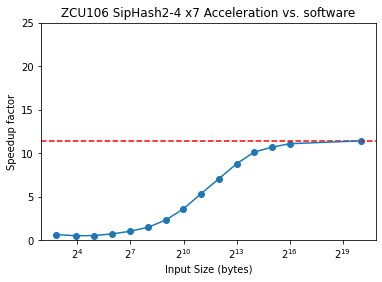

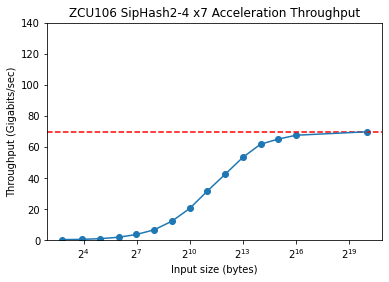

In [34]:
zcu106_throughput_24_x7, zcu106_speedup_24_x7 = graph_n_calc(zcumux_hw_24_x7_cycles, zcumux_sw_24_x7_cycles, input_sizes, "ZCU106 SipHash2-4 x7")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x8:
-----------------------------------------------------

Acceleration vs. software:  13.081 times


ZCU106 SipHash2-4 x8:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.236
      15		|  0.429
      31		|  0.891
      63		|  1.806
     127		|  3.649
     255		|  6.798
     511		|  12.683
    1023		|  22.584
    2047		|  32.442
    4095		|  46.340
    8191		|  60.030
   16383		|  68.196
   32767		|  73.511
   65535		|  76.429
 1048575		|  79.399

ZCU106 SipHash2-4 x8 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.150		|	 0.253
	 0.273		|	 0.583
	 0.566		|	 1.132
	 1.148		|	 1.647
	 2.320		|	 2.309
	 4.322		|	 2.902
	 8.063		|	 3.387
	 14.358		|	 3.628
	 20.625		|	 3.761
	 29.460		|	 3.802
	 38.164		|	 3.860
	 43.356		|	 3.879
	 46.735		|	 3.875
	 48.589		|	 3.854
	 50.478		|	 3.859


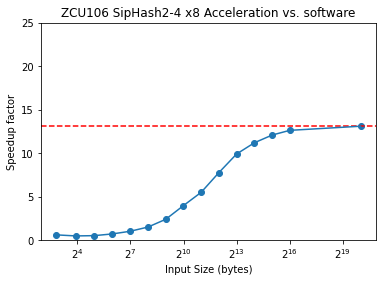

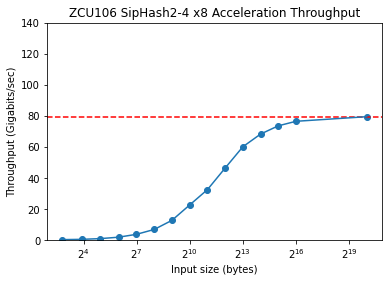

In [35]:
zcu106_throughput_24_x8, zcu106_speedup_24_x8 = graph_n_calc(zcumux_hw_24_x8_cycles, zcumux_sw_24_x8_cycles, input_sizes, "ZCU106 SipHash2-4 x8")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x9:
-----------------------------------------------------

Acceleration vs. software:  11.965 times


ZCU106 SipHash2-4 x9:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.237
      15		|  0.441
      31		|  0.907
      63		|  1.850
     127		|  3.738
     255		|  7.474
     511		|  13.201
    1023		|  21.455
    2047		|  34.663
    4095		|  47.752
    8191		|  57.489
   16383		|  64.317
   32767		|  68.236
   65535		|  70.950
 1048575		|  73.210

ZCU106 SipHash2-4 x9 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.151		|	 0.268
	 0.280		|	 0.611
	 0.576		|	 1.172
	 1.176		|	 1.708
	 2.376		|	 2.357
	 4.752		|	 2.946
	 8.392		|	 3.407
	 13.640		|	 3.639
	 22.037		|	 3.767
	 30.358		|	 3.797
	 36.549		|	 3.862
	 40.889		|	 3.879
	 43.381		|	 3.862
	 45.107		|	 3.857
	 46.543		|	 3.890


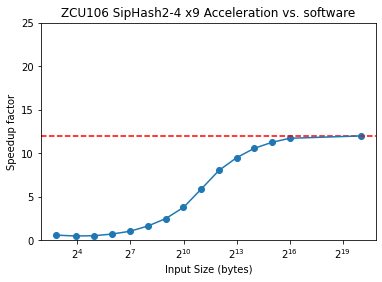

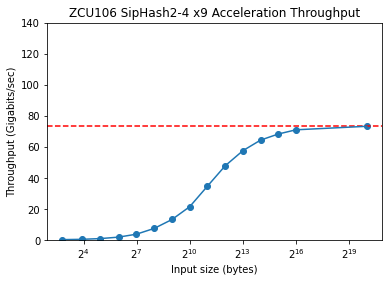

In [36]:
zcu106_throughput_24_x9, zcu106_speedup_24_x9 = graph_n_calc(zcumux_hw_24_x9_cycles, zcumux_sw_24_x9_cycles, input_sizes, "ZCU106 SipHash2-4 x9")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x10:
-----------------------------------------------------

Acceleration vs. software:  13.132 times


ZCU106 SipHash2-4 x10:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.238
      15		|  0.449
      31		|  0.931
      63		|  1.891
     127		|  3.812
     255		|  7.655
     511		|  13.623
    1023		|  24.492
    2047		|  36.589
    4095		|  49.893
    8191		|  62.513
   16383		|  70.505
   32767		|  75.695
   65535		|  78.575
 1048575		|  80.237

ZCU106 SipHash2-4 x10 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.152		|	 0.283
	 0.286		|	 0.636
	 0.592		|	 1.211
	 1.202		|	 1.750
	 2.424		|	 2.383
	 4.866		|	 2.811
	 8.661		|	 3.427
	 15.571		|	 3.648
	 23.261		|	 3.773
	 31.720		|	 3.831
	 39.743		|	 3.864
	 44.824		|	 3.879
	 48.123		|	 3.880
	 49.954		|	 3.857
	 51.010		|	 3.884


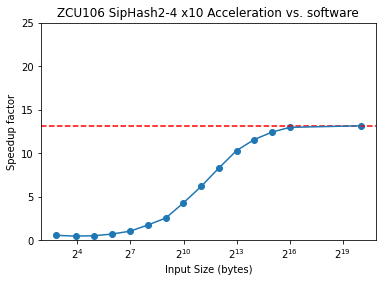

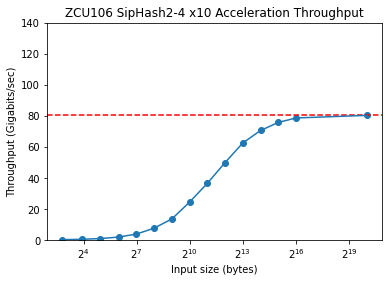

In [37]:
zcu106_throughput_24_x10, zcu106_speedup_24_x10 = graph_n_calc(zcumux_hw_24_x10_cycles, zcumux_sw_24_x10_cycles, input_sizes, "ZCU106 SipHash2-4 x10")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x11:
-----------------------------------------------------

Acceleration vs. software:  14.436 times


ZCU106 SipHash2-4 x11:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.241
      15		|  0.458
      31		|  0.944
      63		|  1.919
     127		|  3.869
     255		|  7.768
     511		|  14.687
    1023		|  25.359
    2047		|  37.165
    4095		|  53.034
    8191		|  67.359
   16383		|  77.450
   32767		|  82.694
   65535		|  86.092
 1048575		|  87.944

ZCU106 SipHash2-4 x11 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.153		|	 0.296
	 0.291		|	 0.660
	 0.600		|	 1.245
	 1.220		|	 1.791
	 2.460		|	 2.425
	 4.938		|	 3.006
	 9.337		|	 3.438
	 16.122		|	 3.656
	 23.627		|	 3.775
	 33.716		|	 3.834
	 42.824		|	 3.868
	 49.239		|	 3.877
	 52.572		|	 3.874
	 54.733		|	 3.872
	 55.910		|	 3.873


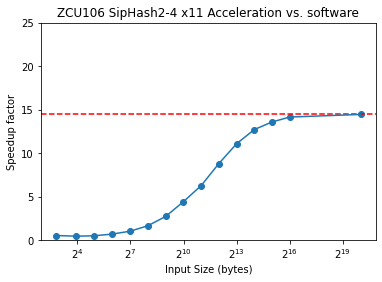

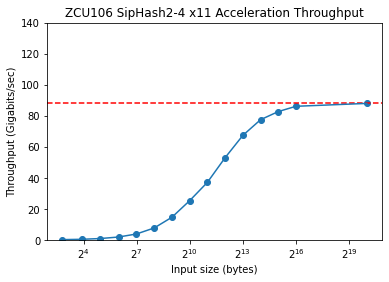

In [38]:
zcu106_throughput_24_x11, zcu106_speedup_24_x11 = graph_n_calc(zcumux_hw_24_x11_cycles, zcumux_sw_24_x11_cycles, input_sizes, "ZCU106 SipHash2-4 x11")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x12:
-----------------------------------------------------

Acceleration vs. software:  16.005 times


ZCU106 SipHash2-4 x12:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.242
      15		|  0.463
      31		|  0.956
      63		|  1.949
     127		|  3.936
     255		|  7.891
     511		|  15.024
    1023		|  25.954
    2047		|  41.368
    4095		|  58.824
    8191		|  72.112
   16383		|  83.442
   32767		|  90.054
   65535		|  93.605
 1048575		|  97.482

ZCU106 SipHash2-4 x12 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.154		|	 0.308
	 0.295		|	 0.679
	 0.608		|	 1.265
	 1.239		|	 1.826
	 2.502		|	 2.454
	 5.016		|	 3.030
	 9.551		|	 3.441
	 16.500		|	 3.662
	 26.300		|	 3.780
	 37.397		|	 3.835
	 45.845		|	 3.869
	 53.048		|	 3.884
	 57.252		|	 3.884
	 59.510		|	 3.850
	 61.974		|	 3.872


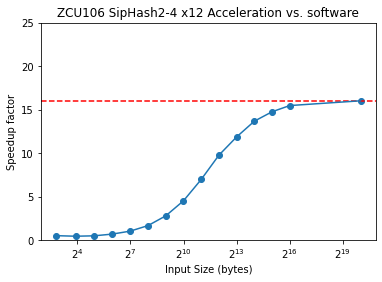

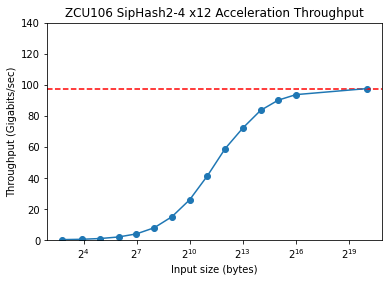

In [39]:
zcu106_throughput_24_x12, zcu106_speedup_24_x12 = graph_n_calc(zcumux_hw_24_x12_cycles, zcumux_sw_24_x12_cycles, input_sizes, "ZCU106 SipHash2-4 x12", display_data = True)

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x13:
-----------------------------------------------------

Acceleration vs. software:  21.477 times


ZCU106 SipHash2-4 x13:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.221
      15		|  0.427
      31		|  0.883
      63		|  1.799
     127		|  3.616
     255		|  7.260
     511		|  13.840
    1023		|  24.270
    2047		|  34.682
    4095		|  49.295
    8191		|  63.563
   16383		|  73.649
   32767		|  81.609
   65535		|  89.559
 1048575		|  109.382

ZCU106 SipHash2-4 x13 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.147		|	 0.278
	 0.285		|	 0.623
	 0.588		|	 1.148
	 1.199		|	 1.619
	 2.410		|	 2.195
	 4.839		|	 2.673
	 9.226		|	 3.031
	 16.179		|	 3.209
	 23.120		|	 3.308
	 32.861		|	 3.356
	 42.373		|	 3.384
	 49.096		|	 3.392
	 54.402		|	 3.393
	 59.703		|	 3.369
	 72.917		|	 3.395


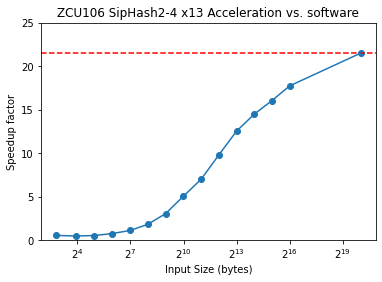

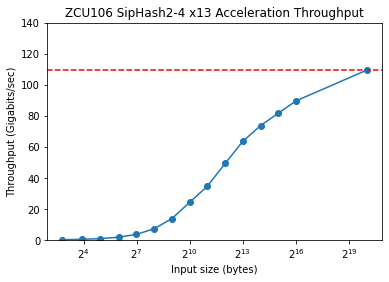

In [40]:
zcu106_throughput_24_x13, zcu106_speedup_24_x13 = graph_n_calc(zcumux_hw_24_x13_cycles, zcumux_sw_24_x13_cycles, input_sizes, "ZCU106 SipHash2-4 x13", display_data = True)

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x14:
-----------------------------------------------------

Acceleration vs. software:  21.935 times


ZCU106 SipHash2-4 x14:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.222
      15		|  0.432
      31		|  0.891
      63		|  1.817
     127		|  3.664
     255		|  7.356
     511		|  14.681
    1023		|  25.823
    2047		|  39.260
    4095		|  51.901
    8191		|  67.275
   16383		|  79.241
   32767		|  87.196
   65535		|  97.924
 1048575		|  111.829

ZCU106 SipHash2-4 x14 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.148		|	 0.287
	 0.288		|	 0.638
	 0.594		|	 1.167
	 1.212		|	 1.667
	 2.442		|	 2.211
	 4.904		|	 2.690
	 9.787		|	 3.038
	 17.214		|	 3.215
	 26.172		|	 3.311
	 34.599		|	 3.358
	 44.847		|	 3.384
	 52.824		|	 3.393
	 58.127		|	 3.391
	 65.279		|	 3.367
	 74.548		|	 3.399


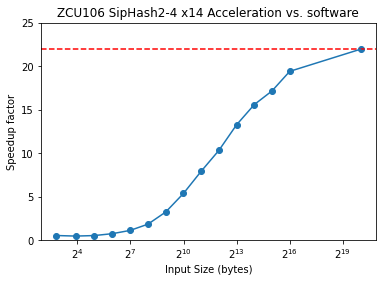

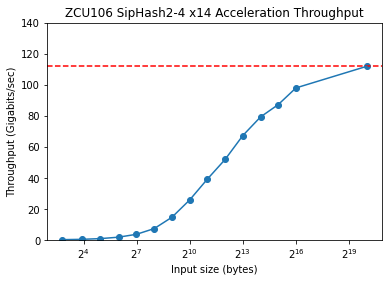

In [41]:
zcu106_throughput_24_x14, zcu106_speedup_24_x14 = graph_n_calc(zcumux_hw_24_x14_cycles, zcumux_sw_24_x14_cycles, input_sizes, "ZCU106 SipHash2-4 x14", display_data = True)

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x15:
-----------------------------------------------------

Acceleration vs. software:  20.400 times


ZCU106 SipHash2-4 x15:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.223
      15		|  0.436
      31		|  0.899
      63		|  1.829
     127		|  3.683
     255		|  7.404
     511		|  14.836
    1023		|  26.069
    2047		|  40.227
    4095		|  52.925
    8191		|  68.926
   16383		|  78.468
   32767		|  87.245
   65535		|  94.388
 1048575		|  103.999

ZCU106 SipHash2-4 x15 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.149		|	 0.297
	 0.290		|	 0.647
	 0.599		|	 1.177
	 1.219		|	 1.688
	 2.455		|	 2.153
	 4.935		|	 2.703
	 9.890		|	 3.040
	 17.378		|	 3.218
	 26.817		|	 3.312
	 35.281		|	 3.359
	 45.948		|	 3.385
	 52.308		|	 3.394
	 58.159		|	 3.396
	 62.922		|	 3.381
	 69.328		|	 3.398


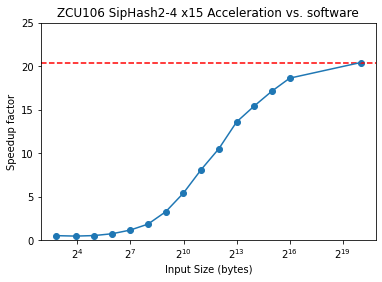

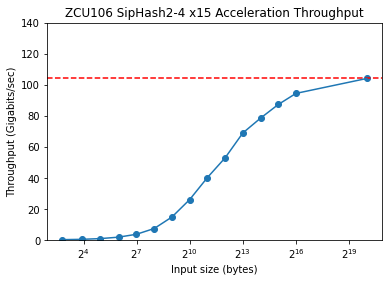

In [42]:
zcu106_throughput_24_x15, zcu106_speedup_24_x15 = graph_n_calc(zcumux_hw_24_x15_cycles, zcumux_sw_24_x15_cycles, input_sizes, "ZCU106 SipHash2-4 x15", display_data = True)

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x16:
-----------------------------------------------------

Acceleration vs. software:  18.409 times


ZCU106 SipHash2-4 x16:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.224
      15		|  0.440
      31		|  0.908
      63		|  1.846
     127		|  3.722
     255		|  7.473
     511		|  14.994
    1023		|  26.602
    2047		|  41.461
    4095		|  54.152
    8191		|  69.988
   16383		|  77.132
   32767		|  82.802
   65535		|  86.000
 1048575		|  93.859

ZCU106 SipHash2-4 x16 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.149		|	 0.304
	 0.293		|	 0.659
	 0.606		|	 1.192
	 1.231		|	 1.703
	 2.481		|	 2.240
	 4.982		|	 2.707
	 9.995		|	 3.045
	 17.733		|	 3.220
	 27.639		|	 3.314
	 36.099		|	 3.350
	 46.656		|	 3.384
	 51.418		|	 3.396
	 55.198		|	 3.383
	 57.330		|	 3.382
	 62.569		|	 3.399


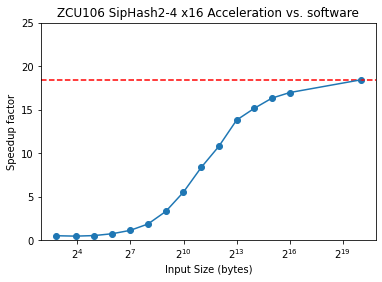

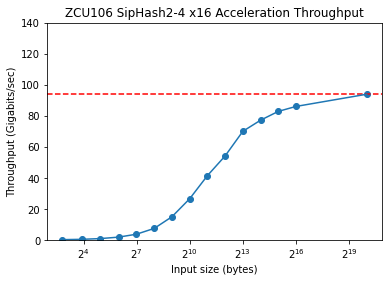

In [43]:
zcu106_throughput_24_x16, zcu106_speedup_24_x16 = graph_n_calc(zcumux_hw_24_x16_cycles, zcumux_sw_24_x16_cycles, input_sizes, "ZCU106 SipHash2-4 x16", display_data = True)

-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x5:
-----------------------------------------------------

Acceleration vs. software:  4.536 times


ZCU106 SipHash1-3 x5:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.194
      15		|  0.337
      31		|  0.702
      63		|  1.419
     127		|  2.860
     255		|  5.757
     511		|  8.952
    1023		|  16.612
    2047		|  24.979
    4095		|  33.185
    8191		|  38.192
   16383		|  43.070
   32767		|  44.998
   65535		|  46.402
 1048575		|  47.861

ZCU106 SipHash1-3 x5 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.115		|	 0.232
	 0.199		|	 0.586
	 0.416		|	 1.084
	 0.840		|	 1.676
	 1.693		|	 2.657
	 3.409		|	 3.622
	 5.301		|	 4.981
	 9.837		|	 5.664
	 14.790		|	 6.053
	 19.650		|	 6.273
	 22.615		|	 6.366
	 25.503		|	 6.400
	 26.644		|	 6.303
	 27.476		|	 6.122
	 28.340		|	 6.248


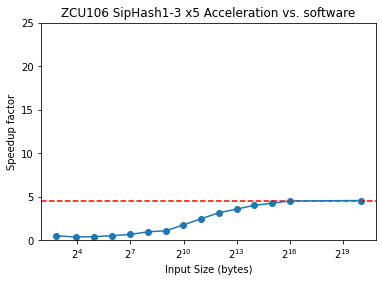

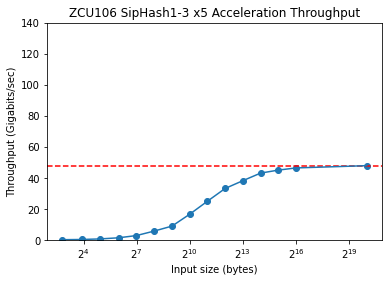

In [44]:
zcu106_throughput_13_x5, zcu106_speedup_13_x5 = graph_n_calc(zcumux_hw_13_x5_cycles, zcumux_sw_13_x5_cycles, input_sizes, "ZCU106 SipHash1-3 x5")

-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x6:
-----------------------------------------------------

Acceleration vs. software:  5.341 times


ZCU106 SipHash1-3 x6:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.200
      15		|  0.393
      31		|  0.816
      63		|  1.509
     127		|  3.035
     255		|  6.123
     511		|  10.482
    1023		|  18.347
    2047		|  27.992
    4095		|  35.771
    8191		|  43.799
   16383		|  50.954
   32767		|  53.235
   65535		|  55.297
 1048575		|  56.530

ZCU106 SipHash1-3 x6 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.119		|	 0.261
	 0.233		|	 0.638
	 0.483		|	 1.170
	 0.894		|	 1.817
	 1.797		|	 2.812
	 3.626		|	 3.806
	 6.206		|	 5.101
	 10.864		|	 5.720
	 16.575		|	 6.083
	 21.181		|	 6.292
	 25.935		|	 6.380
	 30.171		|	 6.415
	 31.522		|	 6.421
	 32.743		|	 6.391
	 33.473		|	 6.268


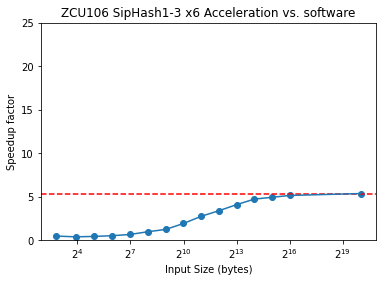

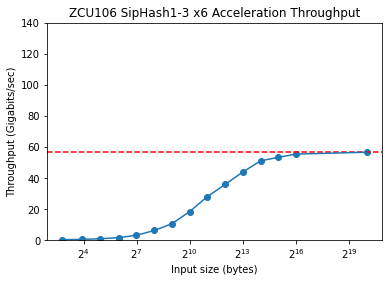

In [45]:
zcu106_throughput_13_x6, zcu106_speedup_13_x6 = graph_n_calc(zcumux_hw_13_x6_cycles, zcumux_sw_13_x6_cycles, input_sizes, "ZCU106 SipHash1-3 x6")

-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x7:
-----------------------------------------------------

Acceleration vs. software:  6.131 times


ZCU106 SipHash1-3 x7:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.229
      15		|  0.411
      31		|  0.850
      63		|  1.724
     127		|  3.208
     255		|  6.469
     511		|  10.470
    1023		|  19.826
    2047		|  30.827
    4095		|  42.765
    8191		|  50.831
   16383		|  58.619
   32767		|  62.038
   65535		|  64.460
 1048575		|  66.769

ZCU106 SipHash1-3 x7 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.135		|	 0.285
	 0.244		|	 0.686
	 0.503		|	 1.247
	 1.021		|	 1.926
	 1.900		|	 2.944
	 3.830		|	 3.958
	 6.199		|	 5.177
	 11.739		|	 5.770
	 18.254		|	 6.110
	 25.322		|	 6.303
	 30.098		|	 6.390
	 34.710		|	 6.436
	 36.734		|	 6.416
	 38.168		|	 6.379
	 39.535		|	 6.449


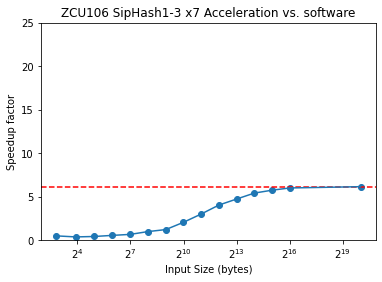

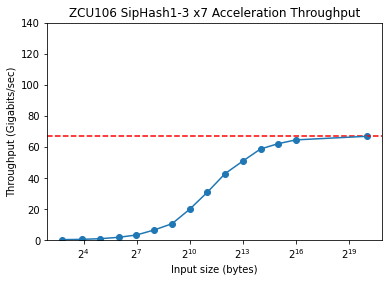

In [46]:
zcu106_throughput_13_x7, zcu106_speedup_13_x7 = graph_n_calc(zcumux_hw_13_x7_cycles, zcumux_sw_13_x7_cycles, input_sizes, "ZCU106 SipHash1-3 x7")


-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x8:
-----------------------------------------------------

Acceleration vs. software:  7.138 times


ZCU106 SipHash1-3 x8:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.231
      15		|  0.424
      31		|  0.876
      63		|  1.781
     127		|  3.582
     255		|  6.716
     511		|  12.507
    1023		|  22.150
    2047		|  33.161
    4095		|  48.278
    8191		|  56.752
   16383		|  66.791
   32767		|  71.129
   65535		|  73.175
 1048575		|  76.303

ZCU106 SipHash1-3 x8 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.137		|	 0.306
	 0.251		|	 0.723
	 0.519		|	 1.305
	 1.054		|	 2.024
	 2.121		|	 3.051
	 3.977		|	 4.072
	 7.406		|	 5.234
	 13.115		|	 5.804
	 19.635		|	 6.131
	 28.586		|	 6.315
	 33.604		|	 6.398
	 39.549		|	 6.431
	 42.117		|	 6.423
	 43.329		|	 6.417
	 45.181		|	 6.329


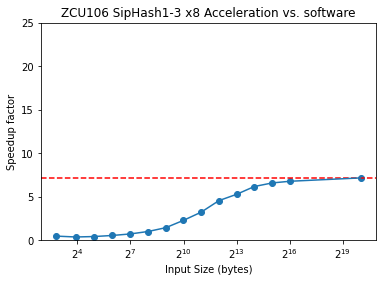

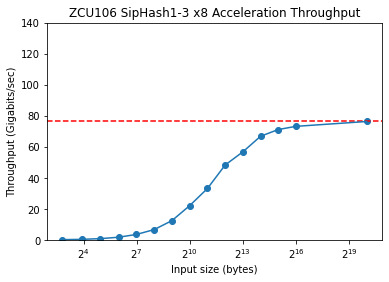

In [47]:
zcu106_throughput_13_x8, zcu106_speedup_13_x8 = graph_n_calc(zcumux_hw_13_x8_cycles, zcumux_sw_13_x8_cycles, input_sizes, "ZCU106 SipHash1-3 x8")


-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x9:
-----------------------------------------------------

Acceleration vs. software:  7.210 times


ZCU106 SipHash1-3 x9:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.233
      15		|  0.432
      31		|  0.892
      63		|  1.814
     127		|  3.663
     255		|  7.341
     511		|  12.923
    1023		|  23.104
    2047		|  35.236
    4095		|  49.281
    8191		|  59.088
   16383		|  68.316
   32767		|  72.537
   65535		|  75.053
 1048575		|  77.838

ZCU106 SipHash1-3 x9 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.138		|	 0.326
	 0.256		|	 0.758
	 0.528		|	 1.361
	 1.074		|	 2.108
	 2.169		|	 2.953
	 4.347		|	 4.165
	 7.652		|	 5.274
	 13.681		|	 5.835
	 20.864		|	 6.149
	 29.181		|	 6.271
	 34.988		|	 6.385
	 40.452		|	 6.450
	 42.951		|	 6.435
	 44.441		|	 6.411
	 46.090		|	 6.392


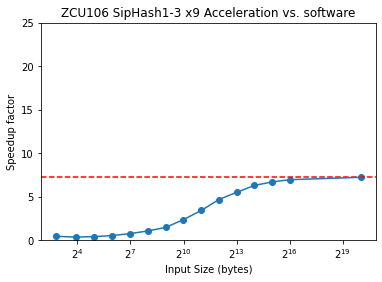

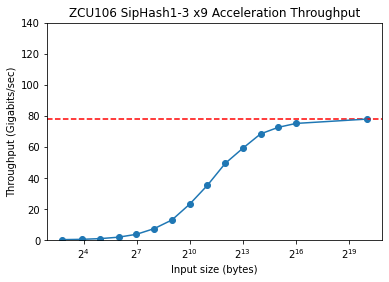

In [48]:
zcu106_throughput_13_x9, zcu106_speedup_13_x9 = graph_n_calc(zcumux_hw_13_x9_cycles, zcumux_sw_13_x9_cycles, input_sizes, "ZCU106 SipHash1-3 x9")


-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x10:
-----------------------------------------------------

Acceleration vs. software:  7.897 times


ZCU106 SipHash1-3 x10:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.235
      15		|  0.441
      31		|  0.912
      63		|  1.847
     127		|  3.510
     255		|  7.490
     511		|  13.236
    1023		|  23.995
    2047		|  37.172
    4095		|  50.006
    8191		|  64.281
   16383		|  74.880
   32767		|  79.669
   65535		|  82.892
 1048575		|  86.272

ZCU106 SipHash1-3 x10 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.139		|	 0.343
	 0.261		|	 0.794
	 0.540		|	 1.409
	 1.094		|	 2.158
	 2.079		|	 3.215
	 4.435		|	 4.229
	 7.837		|	 5.312
	 14.208		|	 5.852
	 22.011		|	 6.162
	 29.610		|	 6.282
	 38.062		|	 6.392
	 44.338		|	 6.431
	 47.174		|	 6.446
	 49.083		|	 6.386
	 51.084		|	 6.468


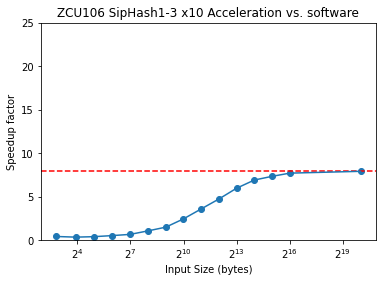

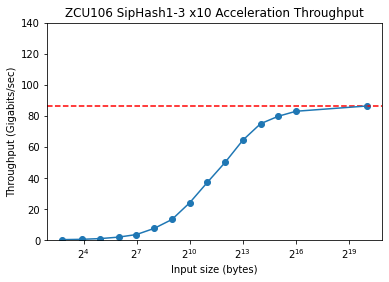

In [49]:
zcu106_throughput_13_x10, zcu106_speedup_13_x10 = graph_n_calc(zcumux_hw_13_x10_cycles, zcumux_sw_13_x10_cycles, input_sizes, "ZCU106 SipHash1-3 x10")


-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x11:
-----------------------------------------------------

Acceleration vs. software:  8.516 times


ZCU106 SipHash1-3 x11:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.236
      15		|  0.448
      31		|  0.924
      63		|  1.888
     127		|  3.793
     255		|  7.641
     511		|  13.004
    1023		|  24.745
    2047		|  38.883
    4095		|  54.572
    8191		|  66.015
   16383		|  75.018
   32767		|  80.947
   65535		|  85.286
 1048575		|  92.454

ZCU106 SipHash1-3 x11 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.140		|	 0.358
	 0.265		|	 0.817
	 0.547		|	 1.445
	 1.118		|	 2.214
	 2.246		|	 3.279
	 4.524		|	 4.162
	 7.700		|	 5.343
	 14.652		|	 5.870
	 23.024		|	 6.172
	 32.313		|	 6.336
	 39.089		|	 6.412
	 44.420		|	 6.444
	 47.930		|	 6.439
	 50.500		|	 6.395
	 54.744		|	 6.428


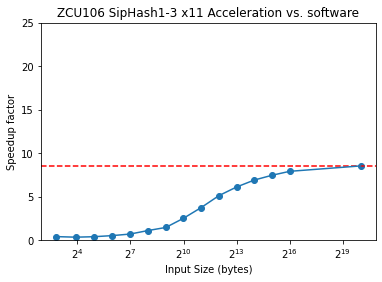

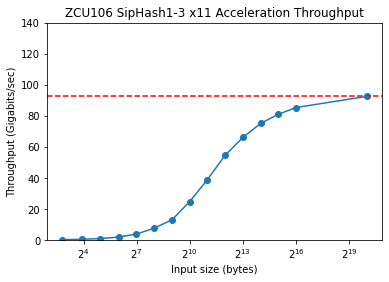

In [50]:
zcu106_throughput_13_x11, zcu106_speedup_13_x11 = graph_n_calc(zcumux_hw_13_x11_cycles, zcumux_sw_13_x11_cycles, input_sizes, "ZCU106 SipHash1-3 x11", display_data = True)


-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x12:
-----------------------------------------------------

Acceleration vs. software:  8.085 times


ZCU106 SipHash1-3 x12:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.238
      15		|  0.456
      31		|  0.943
      63		|  1.914
     127		|  3.865
     255		|  7.760
     511		|  14.773
    1023		|  25.564
    2047		|  39.359
    4095		|  56.302
    8191		|  67.672
   16383		|  77.034
   32767		|  81.710
   65535		|  85.049
 1048575		|  88.325

ZCU106 SipHash1-3 x12 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.141		|	 0.372
	 0.270		|	 0.837
	 0.559		|	 1.482
	 1.133		|	 2.243
	 2.288		|	 3.342
	 4.595		|	 4.347
	 8.748		|	 5.384
	 15.137		|	 5.882
	 23.306		|	 6.183
	 33.338		|	 6.342
	 40.070		|	 6.416
	 45.614		|	 6.446
	 48.382		|	 6.444
	 50.360		|	 6.390
	 52.299		|	 6.468


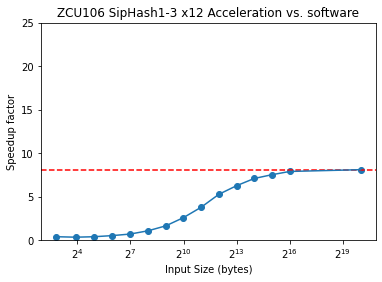

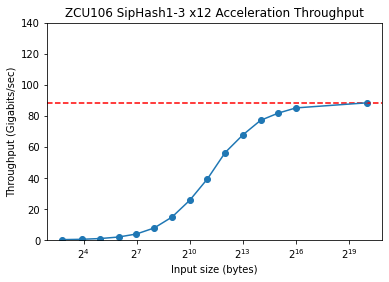

In [51]:
zcu106_throughput_13_x12, zcu106_speedup_13_x12 = graph_n_calc(zcumux_hw_13_x12_cycles, zcumux_sw_13_x12_cycles, input_sizes, "ZCU106 SipHash1-3 x12")


-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x13:
-----------------------------------------------------

Acceleration vs. software:  13.080 times


ZCU106 SipHash1-3 x13:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.221
      15		|  0.426
      31		|  0.884
      63		|  1.796
     127		|  3.616
     255		|  6.897
     511		|  14.548
    1023		|  24.240
    2047		|  37.838
    4095		|  49.356
    8191		|  63.614
   16383		|  73.530
   32767		|  81.661
   65535		|  89.982
 1048575		|  109.849

ZCU106 SipHash1-3 x13 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.147		|	 0.336
	 0.284		|	 0.771
	 0.589		|	 1.357
	 1.197		|	 2.063
	 2.410		|	 2.980
	 4.598		|	 3.965
	 9.698		|	 4.731
	 16.159		|	 5.167
	 25.224		|	 5.418
	 32.902		|	 5.550
	 42.407		|	 5.612
	 49.017		|	 5.637
	 54.437		|	 5.650
	 59.984		|	 5.579
	 73.228		|	 5.599


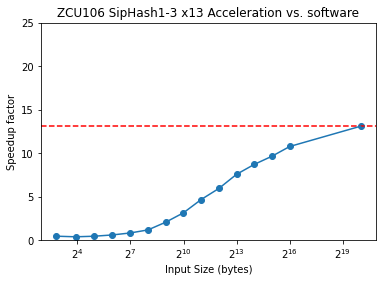

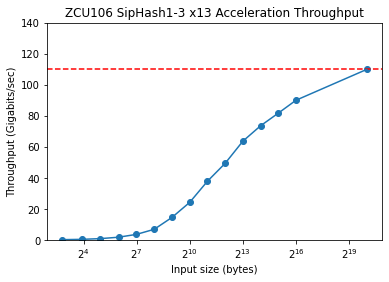

In [52]:
zcu106_throughput_13_x13, zcu106_speedup_13_x13 = graph_n_calc(zcumux_hw_13_x13_cycles, zcumux_sw_13_x13_cycles, input_sizes, "ZCU106 SipHash1-3 x13")


-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x14:
-----------------------------------------------------

Acceleration vs. software:  13.256 times


ZCU106 SipHash1-3 x14:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.222
      15		|  0.433
      31		|  0.891
      63		|  1.817
     127		|  3.664
     255		|  7.356
     511		|  14.681
    1023		|  25.792
    2047		|  35.975
    4095		|  50.828
    8191		|  67.486
   16383		|  78.607
   32767		|  87.163
   65535		|  97.308
 1048575		|  112.047

ZCU106 SipHash1-3 x14 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.148		|	 0.346
	 0.288		|	 0.781
	 0.594		|	 1.373
	 1.212		|	 2.090
	 2.442		|	 3.034
	 4.904		|	 3.976
	 9.787		|	 4.753
	 17.193		|	 5.178
	 23.982		|	 5.419
	 33.883		|	 5.522
	 44.988		|	 5.603
	 52.402		|	 5.640
	 58.105		|	 5.655
	 64.868		|	 5.590
	 74.694		|	 5.635


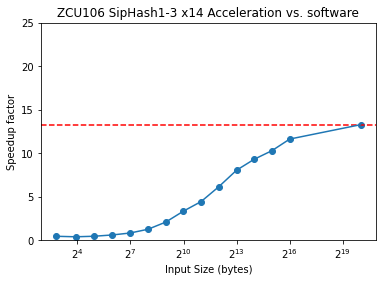

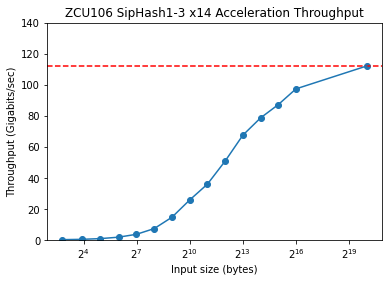

In [53]:
zcu106_throughput_13_x14, zcu106_speedup_13_x14 = graph_n_calc(zcumux_hw_13_x14_cycles, zcumux_sw_13_x14_cycles, input_sizes, "ZCU106 SipHash1-3 x14")


-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x15:
-----------------------------------------------------

Acceleration vs. software:  12.077 times


ZCU106 SipHash1-3 x15:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.223
      15		|  0.437
      31		|  0.902
      63		|  1.834
     127		|  3.697
     255		|  7.423
     511		|  14.875
    1023		|  26.128
    2047		|  40.368
    4095		|  53.047
    8191		|  69.107
   16383		|  79.243
   32767		|  87.039
   65535		|  94.400
 1048575		|  101.772

ZCU106 SipHash1-3 x15 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.149		|	 0.356
	 0.291		|	 0.795
	 0.602		|	 1.392
	 1.223		|	 2.128
	 2.464		|	 3.068
	 4.948		|	 4.001
	 9.916		|	 4.767
	 17.418		|	 5.189
	 26.911		|	 5.425
	 35.363		|	 5.555
	 46.069		|	 5.614
	 52.826		|	 5.641
	 58.022		|	 5.642
	 62.930		|	 5.591
	 67.844		|	 5.618


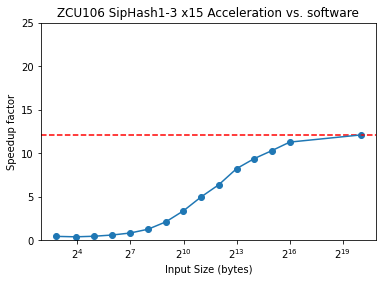

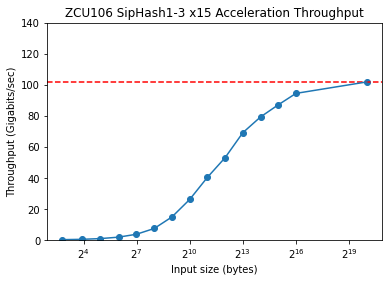

In [54]:
zcu106_throughput_13_x15, zcu106_speedup_13_x15 = graph_n_calc(zcumux_hw_13_x15_cycles, zcumux_sw_13_x15_cycles, input_sizes, "ZCU106 SipHash1-3 x15")


-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x16:
-----------------------------------------------------

Acceleration vs. software:  10.892 times


ZCU106 SipHash1-3 x16:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.224
      15		|  0.440
      31		|  0.910
      63		|  1.849
     127		|  3.726
     255		|  7.473
     511		|  14.975
    1023		|  24.852
    2047		|  40.271
    4095		|  57.310
    8191		|  67.559
   16383		|  78.205
   32767		|  83.346
   65535		|  85.836
 1048575		|  92.449

ZCU106 SipHash1-3 x16 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.149		|	 0.365
	 0.293		|	 0.808
	 0.606		|	 1.409
	 1.232		|	 2.154
	 2.484		|	 3.098
	 4.982		|	 4.020
	 9.983		|	 4.781
	 16.567		|	 5.186
	 26.846		|	 5.431
	 38.204		|	 5.555
	 45.036		|	 5.609
	 52.134		|	 5.641
	 55.561		|	 5.642
	 57.220		|	 5.597
	 61.629		|	 5.658


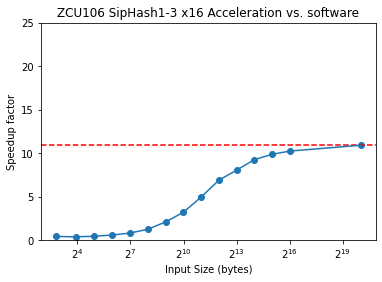

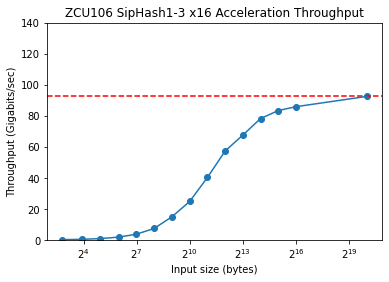

In [55]:
zcu106_throughput_13_x16, zcu106_speedup_13_x16 = graph_n_calc(zcumux_hw_13_x16_cycles, zcumux_sw_13_x16_cycles, input_sizes, "ZCU106 SipHash1-3 x16")


[]

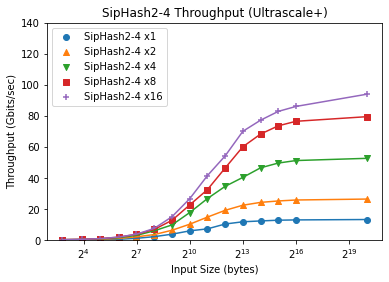

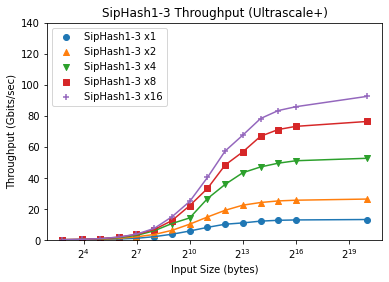

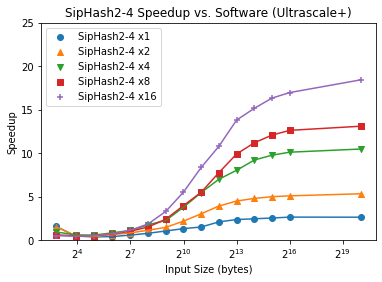

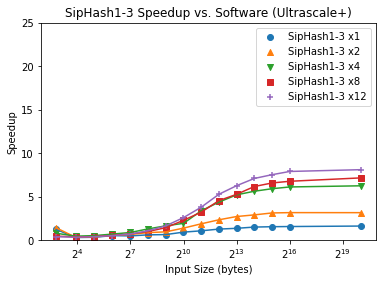

In [58]:
#Graph all data together:

fig = plt.figure()
plt.title("SipHash2-4 Throughput (Ultrascale+)")
plt.ylabel("Throughput (Gbits/sec)")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zcu106_throughput_24_x1, label = 'SipHash2-4 x1', linestyle = 'solid')
plt.plot(input_sizes, zcu106_throughput_24_x1)
plt.scatter(input_sizes, zcu106_throughput_24_x2, label = 'SipHash2-4 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zcu106_throughput_24_x2)
plt.scatter(input_sizes, zcu106_throughput_24_x4, label = 'SipHash2-4 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zcu106_throughput_24_x4)
plt.scatter(input_sizes, zcu106_throughput_24_x8, label = 'SipHash2-4 x8', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zcu106_throughput_24_x8)
plt.scatter(input_sizes, zcu106_throughput_24_x16, label = 'SipHash2-4 x16', linestyle = 'solid', marker = "+")
plt.plot(input_sizes, zcu106_throughput_24_x16)
plt.ylim(0, 140)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

fig = plt.figure()
plt.title("SipHash1-3 Throughput (Ultrascale+)")
plt.ylabel("Throughput (Gbits/sec)")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zcu106_throughput_13_x1, label = 'SipHash1-3 x1', linestyle = 'solid')
plt.plot(input_sizes, zcu106_throughput_13_x1)
plt.scatter(input_sizes, zcu106_throughput_13_x2, label = 'SipHash1-3 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zcu106_throughput_13_x2)
plt.scatter(input_sizes, zcu106_throughput_13_x4, label = 'SipHash1-3 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zcu106_throughput_13_x4)
plt.scatter(input_sizes, zcu106_throughput_13_x8, label = 'SipHash1-3 x8', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zcu106_throughput_13_x8)
plt.scatter(input_sizes, zcu106_throughput_13_x16, label = 'SipHash1-3 x16', linestyle = 'solid', marker = "+")
plt.plot(input_sizes, zcu106_throughput_13_x16)
plt.ylim(0, 140)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

# Speedup graphs

fig = plt.figure()
plt.title("SipHash2-4 Speedup vs. Software (Ultrascale+)")
plt.ylabel("Speedup")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zcu106_speedup_24_x1, label = 'SipHash2-4 x1', linestyle = 'solid')
plt.plot(input_sizes, zcu106_speedup_24_x1)
plt.scatter(input_sizes, zcu106_speedup_24_x2, label = 'SipHash2-4 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zcu106_speedup_24_x2)
plt.scatter(input_sizes, zcu106_speedup_24_x4, label = 'SipHash2-4 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zcu106_speedup_24_x4)
plt.scatter(input_sizes, zcu106_speedup_24_x8, label = 'SipHash2-4 x8', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zcu106_speedup_24_x8)
plt.scatter(input_sizes, zcu106_speedup_24_x16, label = 'SipHash2-4 x16', linestyle = 'solid', marker = "+")
plt.plot(input_sizes, zcu106_speedup_24_x16)
plt.ylim(0, 25)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

fig = plt.figure()
plt.title("SipHash1-3 Speedup vs. Software (Ultrascale+)")
plt.ylabel("Speedup")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zcu106_speedup_13_x1, label = 'SipHash1-3 x1', linestyle = 'solid')
plt.plot(input_sizes, zcu106_speedup_13_x1)
plt.scatter(input_sizes, zcu106_speedup_13_x2, label = 'SipHash1-3 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zcu106_speedup_13_x2)
plt.scatter(input_sizes, zcu106_speedup_13_x4, label = 'SipHash1-3 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zcu106_speedup_13_x4)
plt.scatter(input_sizes, zcu106_speedup_13_x8, label = 'SipHash1-3 x8', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zcu106_speedup_13_x8)
plt.scatter(input_sizes, zcu106_speedup_13_x12, label = 'SipHash1-3 x12', linestyle = 'solid', marker = "+")
plt.plot(input_sizes, zcu106_speedup_13_x12)
plt.ylim(0, 25)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

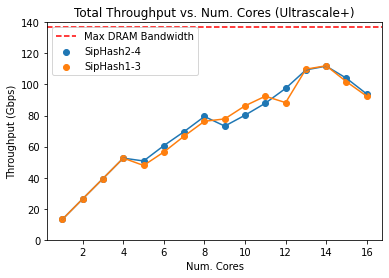

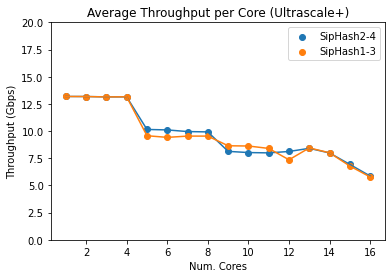

In [61]:
zcu_24_asympt_tput_totals = [zcu106_throughput_24_x1[14], zcu106_throughput_24_x2[14], zcu106_throughput_24_x3[14], zcu106_throughput_24_x4[14], zcu106_throughput_24_x5[14], zcu106_throughput_24_x6[14], zcu106_throughput_24_x7[14], zcu106_throughput_24_x8[14], zcu106_throughput_24_x9[14], zcu106_throughput_24_x10[14], zcu106_throughput_24_x11[14], zcu106_throughput_24_x12[14], zcu106_throughput_24_x13[14], zcu106_throughput_24_x14[14], zcu106_throughput_24_x15[14], zcu106_throughput_24_x16[14]]
zcu_24_asympt_tput_ave = [zcu106_throughput_24_x1[14], zcu106_throughput_24_x2[14] / 2, zcu106_throughput_24_x3[14] / 3, zcu106_throughput_24_x4[14] / 4, zcu106_throughput_24_x5[14] / 5, zcu106_throughput_24_x6[14] / 6, zcu106_throughput_24_x7[14] / 7, zcu106_throughput_24_x8[14] / 8, zcu106_throughput_24_x9[14] / 9, zcu106_throughput_24_x10[14] / 10, zcu106_throughput_24_x11[14] / 11, zcu106_throughput_24_x12[14] / 12, zcu106_throughput_24_x13[14] / 13, zcu106_throughput_24_x14[14] / 14, zcu106_throughput_24_x15[14] / 15, zcu106_throughput_24_x16[14] / 16]

zcu_13_asympt_tput_totals = [zcu106_throughput_13_x1[14], zcu106_throughput_13_x2[14], zcu106_throughput_13_x3[14], zcu106_throughput_13_x4[14], zcu106_throughput_13_x5[14], zcu106_throughput_13_x6[14], zcu106_throughput_13_x7[14], zcu106_throughput_13_x8[14], zcu106_throughput_13_x9[14], zcu106_throughput_13_x10[14], zcu106_throughput_13_x11[14], zcu106_throughput_13_x12[14], zcu106_throughput_13_x13[14], zcu106_throughput_13_x14[14], zcu106_throughput_13_x15[14], zcu106_throughput_13_x16[14]]
zcu_13_asympt_tput_ave = [zcu106_throughput_13_x1[14], zcu106_throughput_13_x2[14] / 2, zcu106_throughput_13_x3[14] / 3, zcu106_throughput_13_x4[14] / 4, zcu106_throughput_13_x5[14] / 5, zcu106_throughput_13_x6[14] / 6, zcu106_throughput_13_x7[14] / 7, zcu106_throughput_13_x8[14] / 8, zcu106_throughput_13_x9[14] / 9, zcu106_throughput_13_x10[14] / 10, zcu106_throughput_13_x11[14] / 11, zcu106_throughput_13_x12[14] / 12, zcu106_throughput_13_x13[14] / 13, zcu106_throughput_13_x14[14] / 14, zcu106_throughput_13_x15[14] / 15, zcu106_throughput_13_x16[14] / 16]


m = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

plt.scatter(m, zcu_24_asympt_tput_totals, label = "SipHash2-4")
plt.scatter(m, zcu_13_asympt_tput_totals, label = "SipHash1-3")
plt.plot(m, zcu_24_asympt_tput_totals)
plt.plot(m, zcu_13_asympt_tput_totals)
plt.title("Total Throughput vs. Num. Cores (Ultrascale+)")
plt.xlabel("Num. Cores")
plt.ylabel("Throughput (Gbps)")
plt.ylim(0, 140)
plt.axhline(136.8, linestyle = "--", color = 'r', label = "Max DRAM Bandwidth")
plt.legend()
plt.show()

plt.scatter(m, zcu_24_asympt_tput_ave, label = "SipHash2-4")
plt.scatter(m, zcu_13_asympt_tput_ave, label = "SipHash1-3")
plt.plot(m, zcu_24_asympt_tput_ave)
plt.plot(m, zcu_13_asympt_tput_ave)
plt.title("Average Throughput per Core (Ultrascale+)")
plt.xlabel("Num. Cores")
plt.ylabel("Throughput (Gbps)")
plt.ylim(0, 20)
plt.legend()
plt.show()